## 50_timeseries_analysis.ipynb
<p style="background-color:#fff6e4; padding:15px; border-width:3px; border-color:#f5ecda; border-style:solid; border-radius:6px"><b>This script provides an EDA and some visualisation for the generated timeseries of the earthquakes dataset.</b> The main parts of the routines were developed in previous courses at the University of London by the same author (Mohr, 2021, 2023, 2024a) and have been further refined to meet the needs of this MSc thesis project/research. However, the code has been updated to comply with the latest requirements and package interdependencies. Some comments will be included in this Jupyter Notebook, and the code contains several inline comments. For details on the project/research itself, refer to the appropriate document.

#### References (for this script)
*Mohr, S. (2021) Regional Spatial Clusters of Earthquakes at the Pacific Ring of Fire: Analysing Data from the USGS ANSS ComCat and Building Regional Spatial Clusters. DSM020, Python, examined coursework cw1. University of London.*

*Mohr, S. (2023) Clustering of Earthquakes on a Worldwide Scale with the Help of Big Data Machine Learning Methods. DSM010, Big Data, examined coursework cw2. University of London.*

*Mohr, S. (2024a) Comparing Different Tectonic Setups Considering Publicly Available Basic Earthquake’s Data. DSM050, Data Visualisation, examined coursework cw1. University of London.*

#### History
<pre>
250111 Generation of script, loading and formatting timeseries, timeseries statustics, plotting timseries,
       technical basis (ACF, PACF, stationarity, differenciating)
250112 Plotting ACF and PACF (function), enhancing analysis for stationarity and differenciating, 
       function for stattionarirty analysis, moving all functions to shared_procedures.py, 
       first tests with crosscorrelation, refining CCF(ts1,ts2) and CCF(ts2,ts1), prepare workflow basics,
250113 TOPn CCF for documentation and comparison per function top_max_min_indices_as_dataframe,
       adding information to figures, adding ci bands, combine everything in function calculate_ccf_results,
       make functions for CCF, move all function to shared_procedures
250114 Rename 'size' to 'count', completely remake show_crosscorrelation_results by adding confidence intervalls,
       re-organize workflow, group important analysis (so far) and clean the code and workbook, no need to make
       a dictionary or something similar due to unessessary work (!)
250115 Added ACF, PACF monthly plots, use scatterplot and stem as an alternative, add more custom parameters,
       seasonal component analysis for ActiveEruptions, adding first tests with FFT
250116 Adding information about timeseries continuity and ruptures, Fourier Analysis, FFT for ActiveEruptions,
       xlimits for FFT figures, finalise FFT, improve stemplots for CCF
250117 Boxcox transformation, Lejung test, HET testing
250118 Make same workflow everywhere, add all data so far, add STFT analysis, show CCF coeff. for FFT 
       Highpower Freqs respective specific lags to compare them with the FFT analysis to decide on their 
       importantance (FFT combined with CCF), check complete notebook for succesfull processing and library 
       imports and make some cleanups using only really needed parts
250121 Switching to parameters.py, adding selectable cluster directory, changing all directories, 
       saving complete notebook as experimentation protocol to cluster directory, add scope and cluster to 
       figure titles, saving CCF figures to data_dir_cluster, save Timeseries Rupture Plot, check and drop 
       non-matching values for Box Cox transformations
250122 Clean everythin, show always the same timeseries, add titles and labels where possible and adequate,
       calculate several CCF (see protocol), check everything, duplicate and adapt it for the GVP analysis, GOOD LUCK!
250123 Prepare everything for creating the figures and protocols (establish test protocol), run gvp_1000 analysis
250124 Update workflow for CCF, add all selected timeseries everwhere, cleanup everything again, make one single
       50_* workflow script for all scopes, analysing scope gvp_1000 and studyarea_1000
       ==> scope studyarea_1000 and scope gvp_1000 are clean and results are saved!
</pre>

#### Todo
<pre>./.</pre>

## Preparing the environment
### System information

In [80]:
# which python installation and version are we using here?
print('\n******* Python Info ***********')
!which python
!python --version

# show some CPU and RAM info
print('\n******* CPU Info ***********')
!lscpu
print('\n******* RAM Info (in GB) ***********')
!free -g


******* Python Info ***********
/bin/python
Python 3.8.10

******* CPU Info ***********
Architecture:                       x86_64
CPU op-mode(s):                     32-bit, 64-bit
Byte Order:                         Little Endian
Address sizes:                      46 bits physical, 48 bits virtual
CPU(s):                             64
On-line CPU(s) list:                0-63
Thread(s) per core:                 2
Core(s) per socket:                 8
Socket(s):                          4
NUMA node(s):                       4
Vendor ID:                          GenuineIntel
CPU family:                         6
Model:                              85
Model name:                         Intel(R) Xeon(R) Gold 6234 CPU @ 3.30GHz
Stepping:                           7
CPU MHz:                            1200.509
CPU max MHz:                        4000.0000
CPU min MHz:                        1200.0000
BogoMIPS:                           6600.00
Virtualization:                     VT-x
L1

In [81]:
# show installed packages and versions
!pip freeze

absl-py==2.1.0
affine==2.4.0
aggdraw==1.3.16
arch==5.6.0
array-record==0.4.0
astropy==5.2.2
asttokens==2.4.1
astunparse==1.6.3
atomicwrites==1.1.5
attrs==19.3.0
Automat==0.8.0
backcall==0.2.0
beautifulsoup4==4.12.3
blinker==1.4
branca==0.8.1
cachetools==5.5.0
certifi==2019.11.28
cftime==1.6.4.post1
chardet==3.0.4
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloud-init==24.3.1
clustpy==0.0.1
colorama==0.4.3
comm==0.2.2
command-not-found==0.3
configobj==5.0.6
confluent-kafka==2.5.3
constantly==15.1.0
contextily==1.5.2
contourpy==1.1.1
cryptography==2.8
cupshelpers==1.0
cycler==0.10.0
dbus-python==1.2.16
debugpy==1.8.7
decorator==4.4.2
defer==1.0.6
distro==1.4.0
distro-info==0.23+ubuntu1.1
dm-tree==0.1.8
dtw==1.4.0
entrypoints==0.3
et-xmlfile==1.0.1
etils==1.3.0
executing==2.0.1
fail2ban==0.11.1
fastjsonschema==2.20.0
filelock==3.13.1
fiona==1.9.6
flatbuffers==24.3.25
folium==0.18.0
fonttools==4.53.1
frites==0.4.4
fsspec==2023.12.2
ftfy==6.2.0
gast==0.4.0
geodatasets==2024.8.0
geographi

### Setting PATH correctly

In [82]:
# there is somewhere a PATH-error on LENA for a while
# adding my packages path to the PATH environment

import sys
sys.path.append("/home/smohr001/.local/lib/python3.8/site-packages")
sys.path

['/home/smohr001/thesis',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/opt/jupyterhub/lib/python3.8/site-packages',
 '/opt/jupyterhub/lib/python3.8/site-packages/IPython/extensions',
 '/home/smohr001/.ipython',
 '/home/smohr001/.local/lib/python3.8/site-packages',
 '/home/smohr001/.local/lib/python3.8/site-packages',
 '/home/smohr001/.local/lib/python3.8/site-packages']

### Loading libraries

In [83]:
# importing standard libraries
import sys
import os
import warnings
import datetime
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import logging
from IPython.display import display, Javascript

# importing shared procedures for this procect (needs to be a simple .py file)
%run shared_procedures.py

# importing additional libraries

# get info about installed and used versions of some important (deep learning) libraries
print("Some important installed libraries:\n")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Seaborn version: {sns.__version__}")

Some important installed libraries:

Pandas version: 1.4.1
Numpy version: 1.22.2
Seaborn version: 0.13.2


<Figure size 432x288 with 0 Axes>

### Setting the script environment

In [84]:
# import the parameters (foreced to reload)
import parameters
import importlib
importlib.reload(parameters)

# # print all loaded parameters from the Python file
print_loaded_parameters(parameters)            

Loaded Parameters:

parameters.buffer_size_km = 1000
parameters.data_dir = data/scope/reclustered_1000
parameters.data_dir_raw = data
parameters.data_ts_dir = data/scope/reclustered_1000
parameters.scope_id = reclustered_1000


In [85]:
# show all matplotlib graphs inline
%matplotlib inline

# setting format to JPG for easy copy & paste for figures
# for high quality outputs choose 'svg'
%config InlineBackend.figure_format = 'jpg'

# adjust display settings to show 20 rows as a standard
pd.set_option('display.max_rows', 20)

# disable warnings (activate after developing the complete code)
warnings.filterwarnings('ignore')

# set script (ipynb notebook) name (e.g. for logging)
script_name = "50_timeseries_analysis.ipynb"

# start parameterized logging
setup_logging(logfile_dir = "log", 
              logfile_name = "50_analysis.log", 
              log_level = logging.INFO, 
              script_name = script_name
             )

# set data directory
if(parameters.data_dir_raw):
    data_dir_raw = parameters.data_dir_raw
else:
    data_dir_raw = "data"
logging.info(f"{script_name}: Set raw data directory to './{data_dir_raw}'.")

if(parameters.data_dir):
    data_dir = parameters.data_dir
else:
    data_dir = "data"
logging.info(f"{script_name}: Set scope data directory to './{data_dir}'.")

if(parameters.data_ts_dir):
    data_ts_dir = parameters.data_ts_dir
else:
    data_ts_dir = "data/timeseries"
logging.info(f"{script_name}: Set scope timeseries data directory to './{data_ts_dir}'.")

2025-02-02 20:25:31,734 - INFO - Starting script '50_timeseries_analysis.ipynb'.
2025-02-02 20:25:31,735 - INFO - Set loglevel to INFO.
2025-02-02 20:25:31,736 - INFO - 50_timeseries_analysis.ipynb: Set raw data directory to './data'.
2025-02-02 20:25:31,737 - INFO - 50_timeseries_analysis.ipynb: Set scope data directory to './data/scope/reclustered_1000'.
2025-02-02 20:25:31,738 - INFO - 50_timeseries_analysis.ipynb: Set scope timeseries data directory to './data/scope/reclustered_1000'.


In [86]:
# set fixed seed for reproducibility
reset_random_seeds(script_name=script_name)

2025-02-02 20:25:31,742 - INFO - 50_timeseries_analysis.ipynb: Seeding random generators with seed=654321.


## Loading timeseries

In [87]:
# set individual clusterdir for saving
selected_subdir = choose_subdirectory(data_dir)
data_dir_cluster = os.path.join(data_dir, selected_subdir)
data_ts_dir_cluster = os.path.join(data_ts_dir, selected_subdir)
logging.info(f"{script_name}: Set cluster data directory to './{data_dir_cluster}'.")
logging.info(f"{script_name}: Set cluster timeseries data directory to './{data_ts_dir_cluster}'.")

# set all timeseries names for saving and loading
ts_names_load = ["eq_ts_daily_multi", "eq_ts_weekly_multi", "eq_ts_monthly_multi", "eq_ts_yearly_multi",
                "erupt_ts_daily_multi", "erupt_ts_weekly_multi", "erupt_ts_monthly_multi", "erupt_ts_yearly_multi"]

# iterate over the timeseries names and load them into global objects
for name in ts_names_load:
    ts = load_timeseries(
        data_file=f"{name}.csv",
        data_dir=data_ts_dir_cluster
    )
    globals()[name] = ts

# iterate over loaded timeseries and set freq and index correctly
for name in ts_names_load:
    ts = eval(name) 
    inferred_freq = pd.infer_freq(ts.index)
    ts.index.freq = inferred_freq
    ts.index = pd.to_datetime(ts.index)
    logging.info(f"Assigned and formatted timeseries ({inferred_freq}) for {name}.")    

Available subdirectories:
1: cluster_Cluster_4
2: cluster_Cluster_3
3: cluster_Cluster_0
4: cluster_Cluster_5
5: cluster_Cluster_6
6: cluster_Cluster_1
7: cluster_Cluster_2
Enter the number of the subdirectory you want to choose: 5


2025-02-02 20:25:50,459 - INFO - 50_timeseries_analysis.ipynb: Set cluster data directory to './data/scope/reclustered_1000/cluster_Cluster_6'.
2025-02-02 20:25:50,460 - INFO - 50_timeseries_analysis.ipynb: Set cluster timeseries data directory to './data/scope/reclustered_1000/cluster_Cluster_6'.
2025-02-02 20:25:50,509 - INFO - load_timeseries: Timeseries assigned from 'data/scope/reclustered_1000/cluster_Cluster_6/eq_ts_daily_multi.csv'.
2025-02-02 20:25:50,523 - INFO - load_timeseries: Timeseries assigned from 'data/scope/reclustered_1000/cluster_Cluster_6/eq_ts_weekly_multi.csv'.
2025-02-02 20:25:50,534 - INFO - load_timeseries: Timeseries assigned from 'data/scope/reclustered_1000/cluster_Cluster_6/eq_ts_monthly_multi.csv'.
2025-02-02 20:25:50,544 - INFO - load_timeseries: Timeseries assigned from 'data/scope/reclustered_1000/cluster_Cluster_6/eq_ts_yearly_multi.csv'.
2025-02-02 20:25:50,561 - INFO - load_timeseries: Timeseries assigned from 'data/scope/reclustered_1000/cluster_C

## EDA

### Statistics and basic information

In [88]:
# show basic timeseries summaries 
for name in ts_names_load:
    ts = eval(name) 
    print(f"===== Timeseries summary for {name}:=====")
    print(f"{summarize_time_series(ts)}, {type(ts)}, {ts.columns}\n")

===== Timeseries summary for eq_ts_daily_multi:=====
{'number_of_entries': 18262, 'first_date': Timestamp('1970-01-01 00:00:00'), 'last_date': Timestamp('2019-12-31 00:00:00'), 'ts_type': <class 'pandas.core.frame.DataFrame'>, 'ts_freq_index': 'D', 'ts_freq_inferred': 'D'}, <class 'pandas.core.frame.DataFrame'>, Index(['count', 'mag_max', 'energy_sum', 'energy_max', 'tsunami_sum',
       'felt_mean', 'cdi_mean', 'nst_mean', 'mmi_mean'],
      dtype='object')

===== Timeseries summary for eq_ts_weekly_multi:=====
{'number_of_entries': 2610, 'first_date': Timestamp('1970-01-04 00:00:00'), 'last_date': Timestamp('2020-01-05 00:00:00'), 'ts_type': <class 'pandas.core.frame.DataFrame'>, 'ts_freq_index': 'W-SUN', 'ts_freq_inferred': 'W-SUN'}, <class 'pandas.core.frame.DataFrame'>, Index(['count', 'mag_max', 'energy_sum', 'energy_max', 'tsunami_sum',
       'felt_mean', 'cdi_mean', 'nst_mean', 'mmi_mean'],
      dtype='object')

===== Timeseries summary for eq_ts_monthly_multi:=====
{'number_

### Plot timeseries

#### Daily

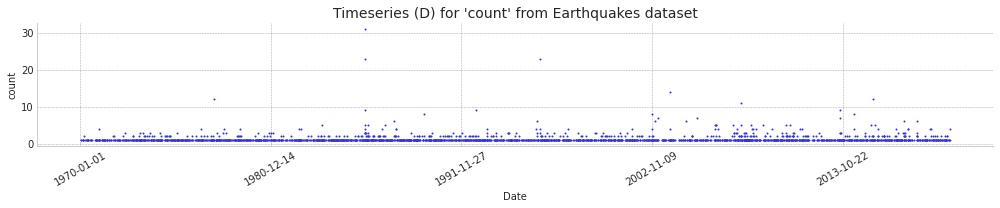

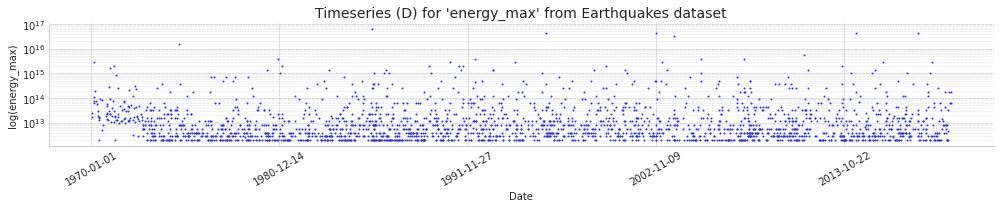

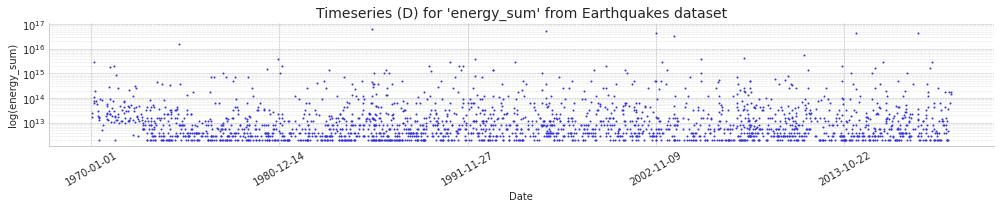

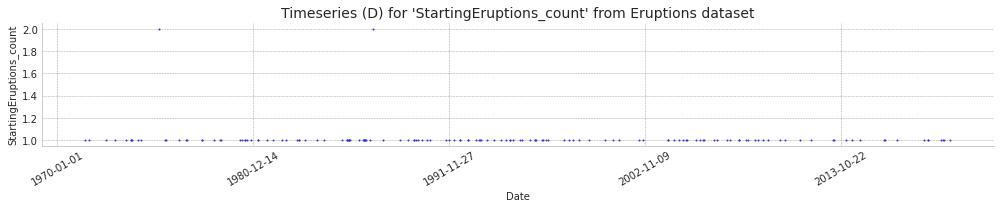

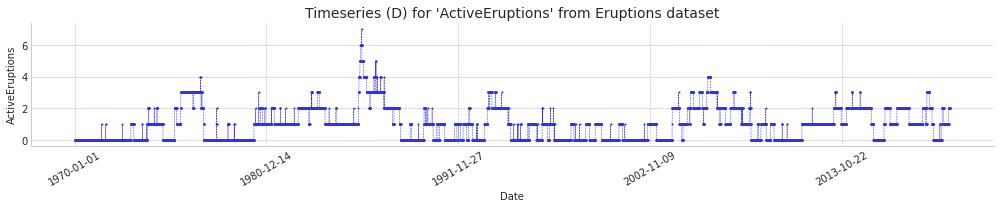

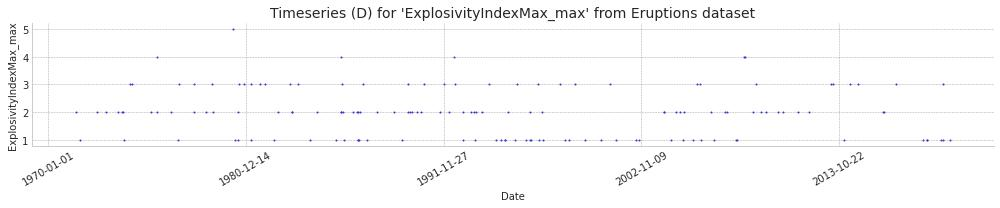

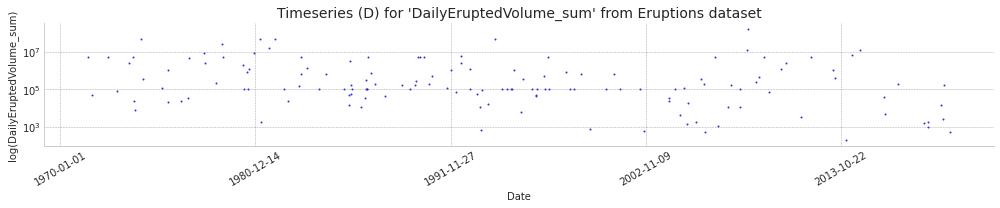

In [89]:
# defining the daily plots
plot_definitions = [
    # earthquakes daily
    ['eq_ts_daily_multi', 'count', False, False, 1, 'Earthquakes dataset'],
    ['eq_ts_daily_multi', 'energy_max', False, True, 1, 'Earthquakes dataset'],
    ['eq_ts_daily_multi', 'energy_sum', False, True, 1, 'Earthquakes dataset'],
    
    # eruptions daily
    ['erupt_ts_daily_multi', 'StartingEruptions_count', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_daily_multi', 'ActiveEruptions', True, False, 1, 'Eruptions dataset'],
    ['erupt_ts_daily_multi', 'ExplosivityIndexMax_max', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_daily_multi', 'DailyEruptedVolume_sum', False, True, 1, 'Eruptions dataset'],
]

# loop through plot definitions and generate plots
for definition in plot_definitions:
    ts_name, feature_name, plot_lines, logarithmic, dot_size, topic = definition
    ts = eval(ts_name)[feature_name]
    plot_timeseries(ts=ts, 
                    feature_name=feature_name, 
                    plot_lines=plot_lines, 
                    logarithmic=logarithmic, 
                    dot_size=dot_size, 
                    figsize=(14, 3),
                    topic=topic
                   )

#### Weekly

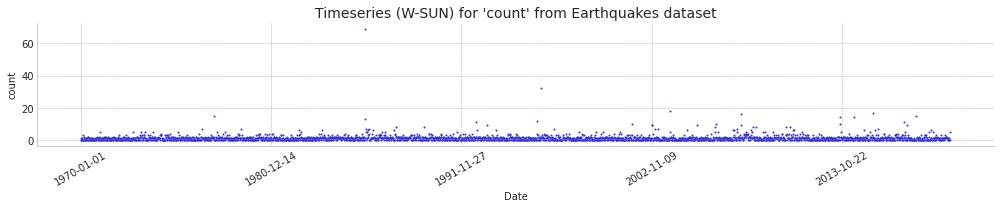

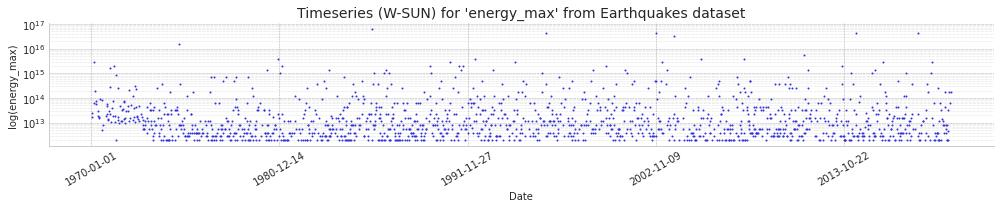

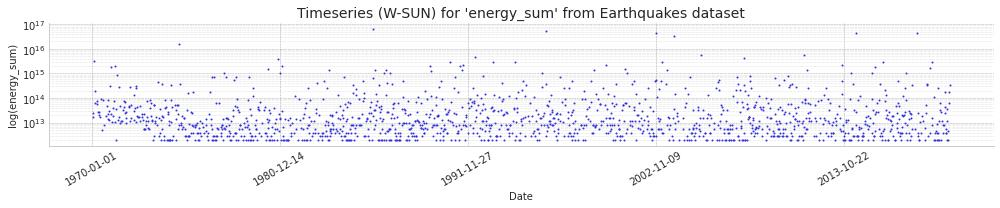

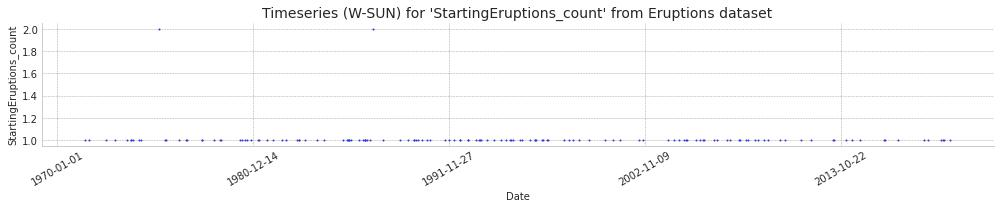

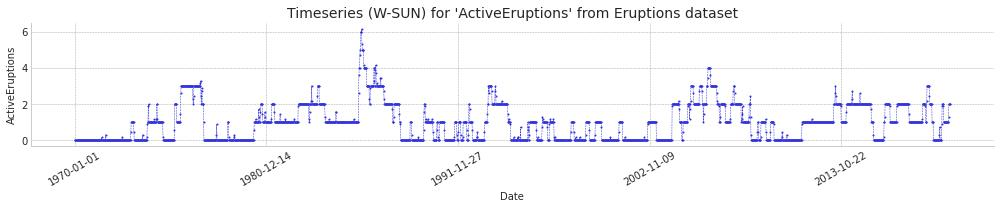

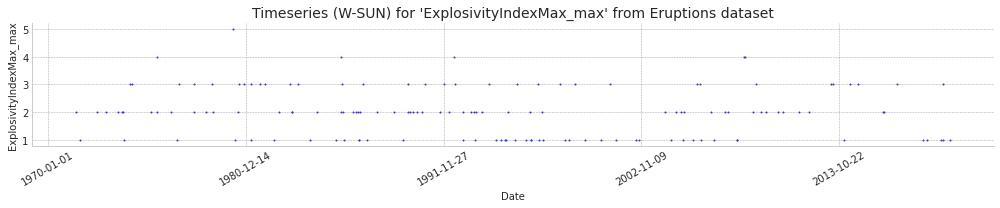

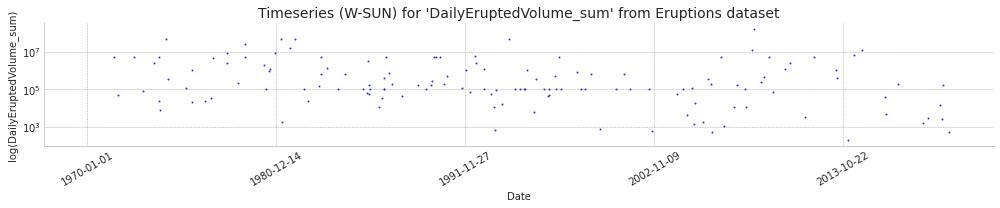

In [90]:
# defining the weekly plots
plot_definitions = [
    # earthquakes weekly
    ['eq_ts_weekly_multi', 'count', False, False, 1, 'Earthquakes dataset'],
    ['eq_ts_weekly_multi', 'energy_max', False, True, 1, 'Earthquakes dataset'],
    ['eq_ts_weekly_multi', 'energy_sum', False, True, 1, 'Earthquakes dataset'],
    
    # eruptions weekly
    ['erupt_ts_weekly_multi', 'StartingEruptions_count', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_weekly_multi', 'ActiveEruptions', True, False, 1, 'Eruptions dataset'],
    ['erupt_ts_weekly_multi', 'ExplosivityIndexMax_max', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_weekly_multi', 'DailyEruptedVolume_sum', False, True, 1, 'Eruptions dataset'],
]

# loop through plot definitions and generate plots
for definition in plot_definitions:
    ts_name, feature_name, plot_lines, logarithmic, dot_size, topic = definition
    ts = eval(ts_name)[feature_name]
    plot_timeseries(ts=ts, 
                    feature_name=feature_name, 
                    plot_lines=plot_lines, 
                    logarithmic=logarithmic, 
                    dot_size=dot_size, 
                    figsize=(14, 3),
                    topic=topic
                   )

#### Monthly

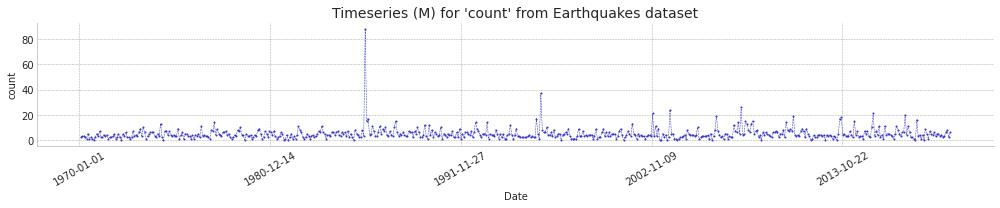

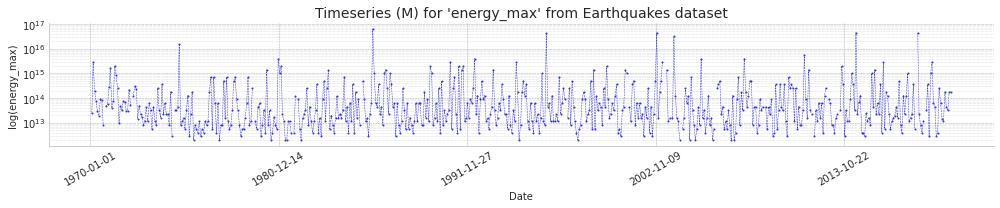

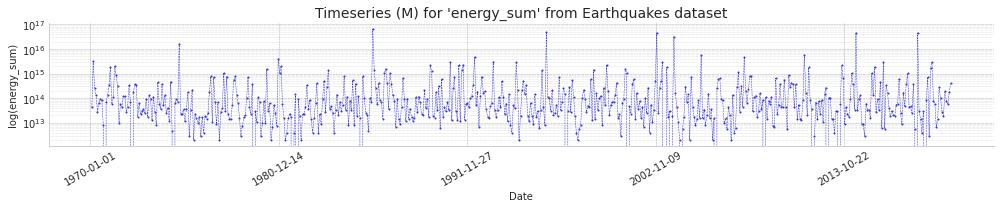

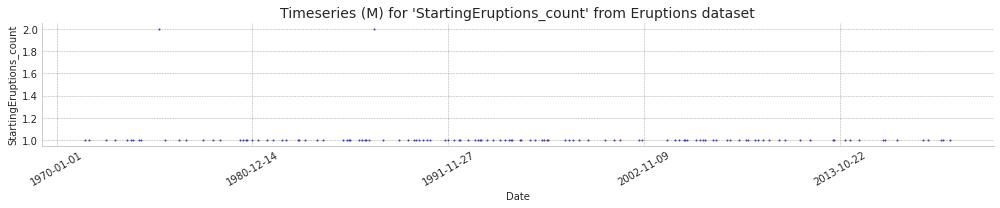

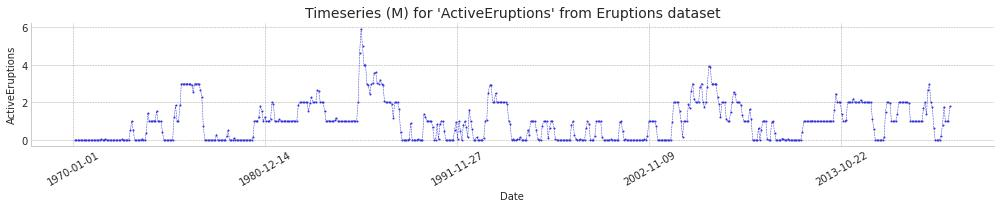

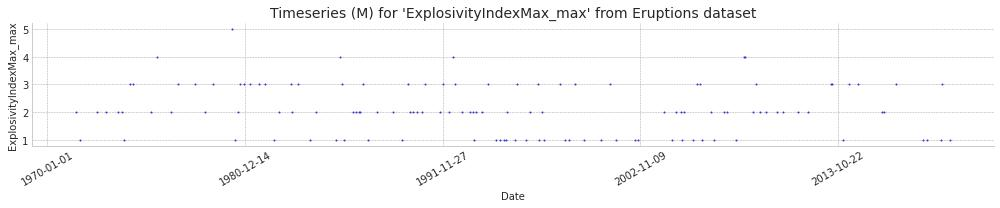

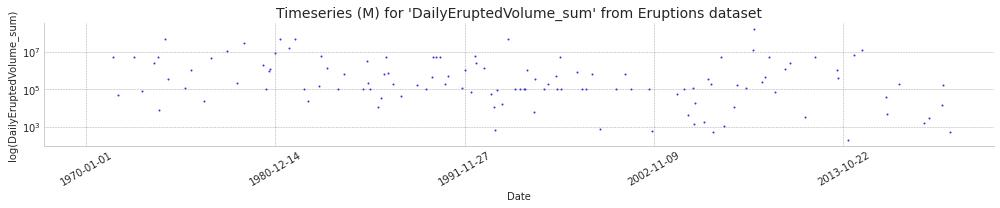

In [91]:
# defining the monthly plots
plot_definitions = [
    # earthquakes monthly
    ['eq_ts_monthly_multi', 'count', True, False, 1, 'Earthquakes dataset'],
    ['eq_ts_monthly_multi', 'energy_max', True, True, 1, 'Earthquakes dataset'],
    ['eq_ts_monthly_multi', 'energy_sum', True, True, 1, 'Earthquakes dataset'],
    
    # eruptions
    ['erupt_ts_monthly_multi', 'StartingEruptions_count', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_monthly_multi', 'ActiveEruptions', True, False, 1, 'Eruptions dataset'],
    ['erupt_ts_monthly_multi', 'ExplosivityIndexMax_max', False, False, 1, 'Eruptions dataset'],
    ['erupt_ts_monthly_multi', 'DailyEruptedVolume_sum', False, True, 1, 'Eruptions dataset'],
]

# loop through plot definitions and generate plots
for definition in plot_definitions:
    ts_name, feature_name, plot_lines, logarithmic, dot_size, topic = definition
    ts = eval(ts_name)[feature_name]
    plot_timeseries(ts=ts, 
                    feature_name=feature_name, 
                    plot_lines=plot_lines, 
                    logarithmic=logarithmic, 
                    dot_size=dot_size, 
                    figsize=(14, 3),
                    topic=topic
                   )

#### Yearly

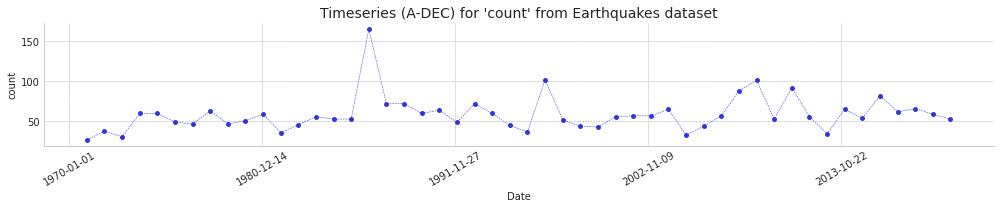

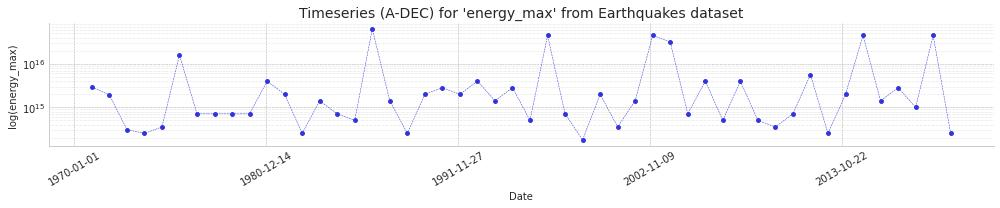

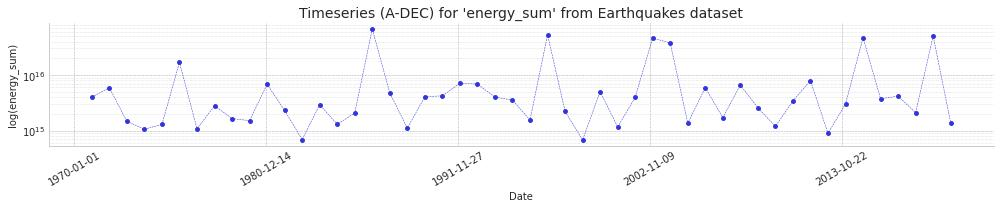

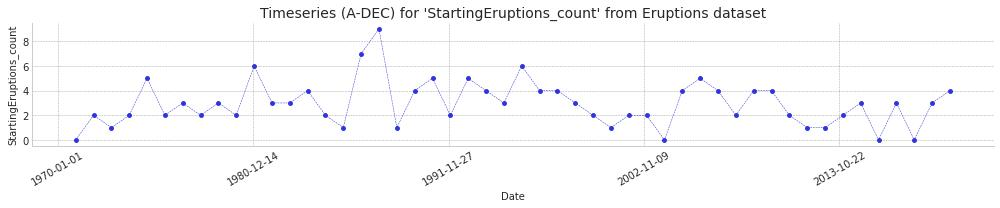

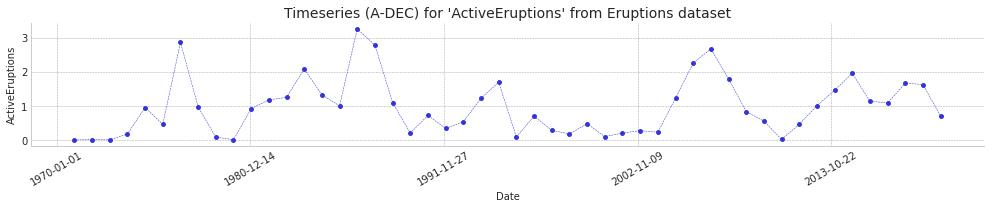

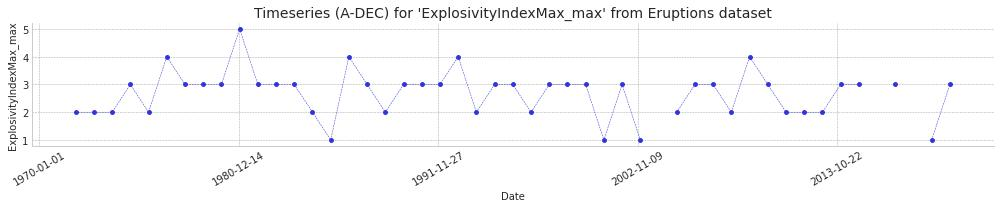

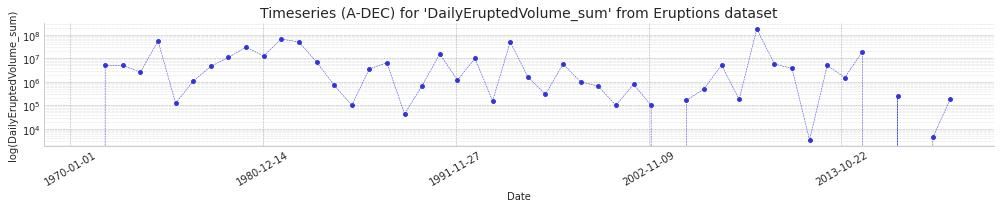

In [92]:
# defining the yearly plots
plot_definitions = [
    # earthquakes yearly
    ['eq_ts_yearly_multi', 'count', True, False, 15, 'Earthquakes dataset'],
    ['eq_ts_yearly_multi', 'energy_max', True, True, 15, 'Earthquakes dataset'],
    ['eq_ts_yearly_multi', 'energy_sum', True, True, 15, 'Earthquakes dataset'],
    
    # eruptions yearly
    ['erupt_ts_yearly_multi', 'StartingEruptions_count', True, False, 15, 'Eruptions dataset'],
    ['erupt_ts_yearly_multi', 'ActiveEruptions', True, False, 15, 'Eruptions dataset'],
    ['erupt_ts_yearly_multi', 'ExplosivityIndexMax_max', True, False, 15, 'Eruptions dataset'],
    ['erupt_ts_yearly_multi', 'DailyEruptedVolume_sum', True, True, 15, 'Eruptions dataset'],
]

# loop through plot definitions and generate plots
for definition in plot_definitions:
    ts_name, feature_name, plot_lines, logarithmic, dot_size, topic = definition
    ts = eval(ts_name)[feature_name]
    plot_timeseries(ts=ts, 
                    feature_name=feature_name, 
                    plot_lines=plot_lines, 
                    logarithmic=logarithmic, 
                    dot_size=dot_size, 
                    figsize=(14, 3),
                    topic=topic
                   )

## Timeseries continuity and ruptures

### Yearly

No NaN found in (Earthquakes Count)!
Timeseries Rupture Plot, pen=1
[5, 15, 25, 30, 50]


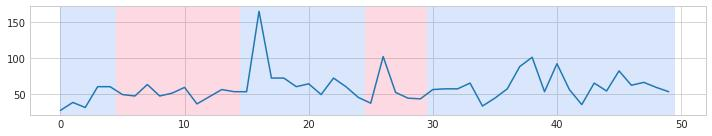

2025-02-02 20:25:55,307 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_count_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


Timeseries Rupture Plot, pen=2
[50]


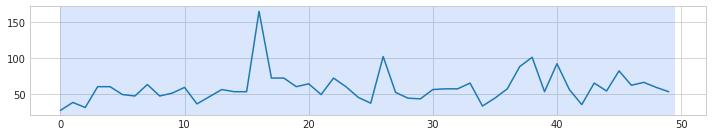

In [93]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['count'], identification='Earthquakes Count')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_count_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()

No NaN found in (Released earthquake energy)!
Timeseries Rupture Plot, pen=1
[50]


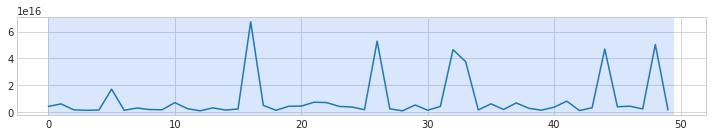

Timeseries Rupture Plot, pen=2
[50]


2025-02-02 20:25:55,510 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_energy_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


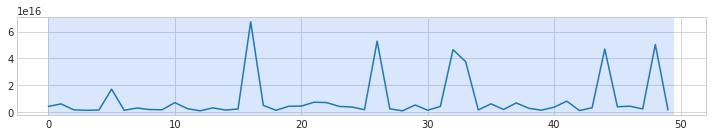

In [94]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['energy_sum'], identification='Released earthquake energy')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_energy_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()    

No NaN found in (Max earthquake magnitude)!
Timeseries Rupture Plot, pen=1
[20, 25, 50]


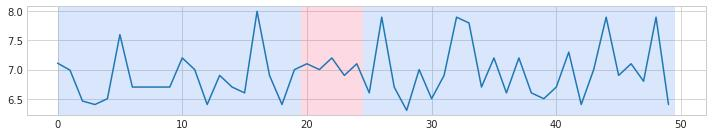

2025-02-02 20:25:55,715 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_max_energy_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


Timeseries Rupture Plot, pen=2
[50]


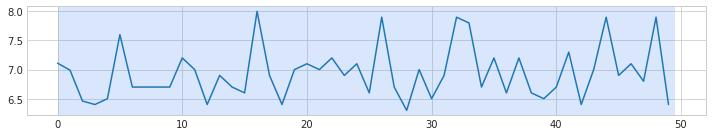

In [95]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['mag_max'], identification='Max earthquake magnitude')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_max_energy_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()    

No NaN found in (Starting eruptions)!
Timeseries Rupture Plot, pen=1
[50]


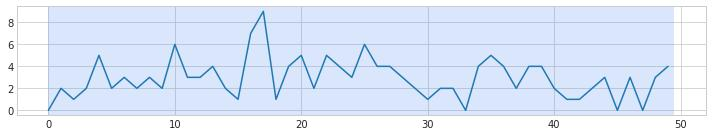

2025-02-02 20:25:55,922 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_StartingEruptions_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


Timeseries Rupture Plot, pen=2
[50]


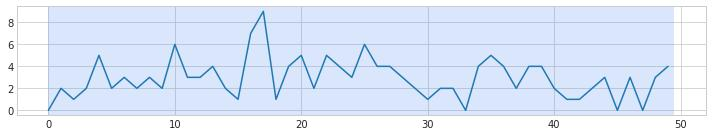

In [96]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['StartingEruptions_count'], identification='Starting eruptions')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_StartingEruptions_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()

No NaN found in (Erupted Volume)!
Timeseries Rupture Plot, pen=1
[25, 50]


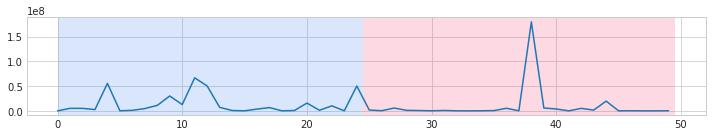

2025-02-02 20:25:56,127 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_EruptedVolume_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


Timeseries Rupture Plot, pen=2
[50]


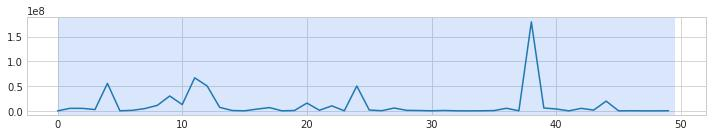

In [97]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['DailyEruptedVolume_sum'], identification='Erupted Volume')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_EruptedVolume_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()

Number of NaN 4, imputing (Max VEI) with mean value!
Timeseries Rupture Plot, pen=1
[50]


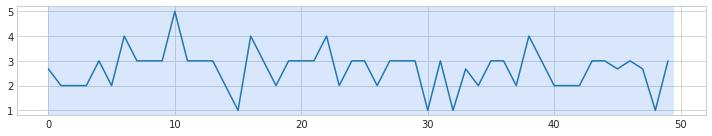

Timeseries Rupture Plot, pen=2
[50]


2025-02-02 20:25:56,334 - INFO - 50_timeseries_analysis.ipynb: 50_TRP_earthquakes_max_ExplosivityIndexMax_pen(2)_result_50_.png to './data/scope/reclustered_1000/cluster_Cluster_6'.


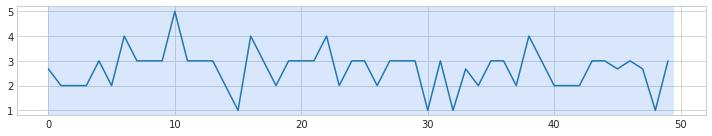

In [98]:
# get the imputed timeseries
ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['ExplosivityIndexMax_max'], identification='Max VEI')).values

# Timeseries Rupture Plot
max_pen = 2
for pen in range(1, max_pen+1):
    print(f"Timeseries Rupture Plot, pen={pen}")
    algo = rpt.Pelt(model="rbf").fit(ts1_data)
    result = algo.predict(pen=pen)
    print(result)
    rpt.display(ts1_data, result)
    if(pen == max_pen):
        figurename = (f"50_TRP_earthquakes_max_ExplosivityIndexMax_pen({pen})_result{result}.png").replace("[", "_").replace("]", "_").replace(",", "_")
        plt.savefig(os.path.join(data_ts_dir_cluster, figurename), format='png', dpi=150, bbox_inches='tight')
        logging.info(f"{script_name}: {figurename} to './{data_ts_dir_cluster}'.")
    plt.show()

## ACF and PACF analysis

Number of NaN 16048, imputing (Earthquakes, Count) with mean value!


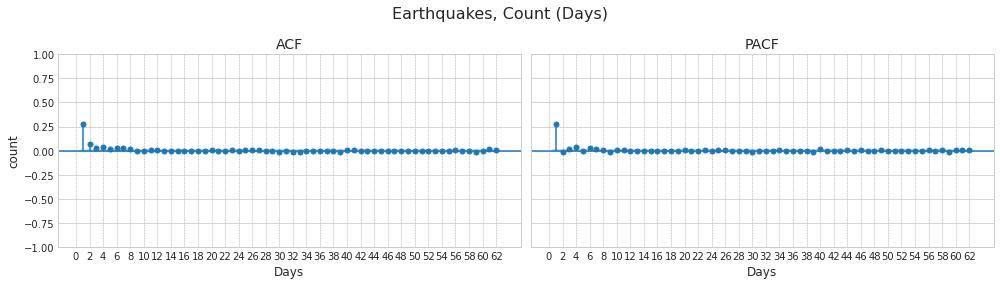

Number of NaN 16048, imputing (Earthquakes, Released Energy) with mean value!


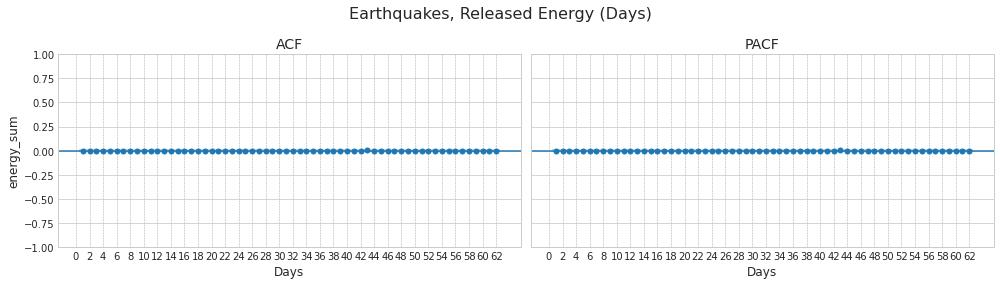

Number of NaN 16048, imputing (Earthquakes, max Magnitude) with mean value!


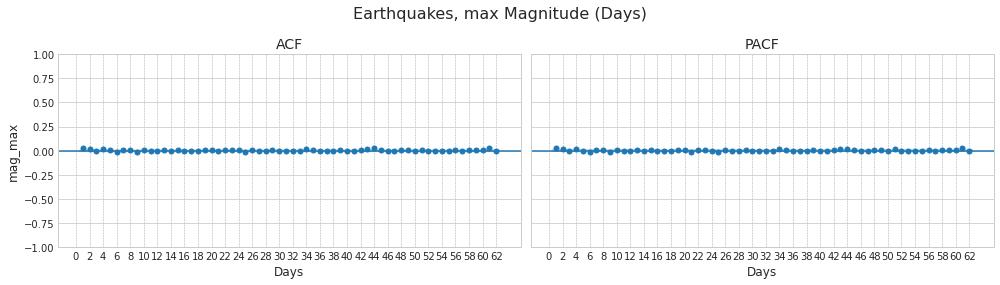

Number of NaN 18117, imputing (Eruptions, Count) with mean value!


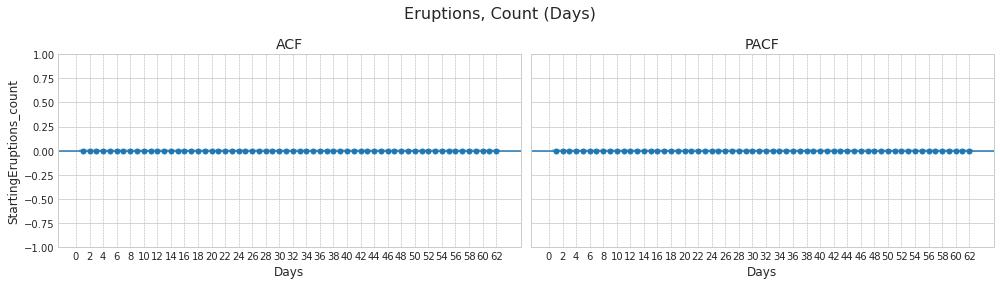

Number of NaN 18117, imputing (Eruptions, Erupted Volume) with mean value!


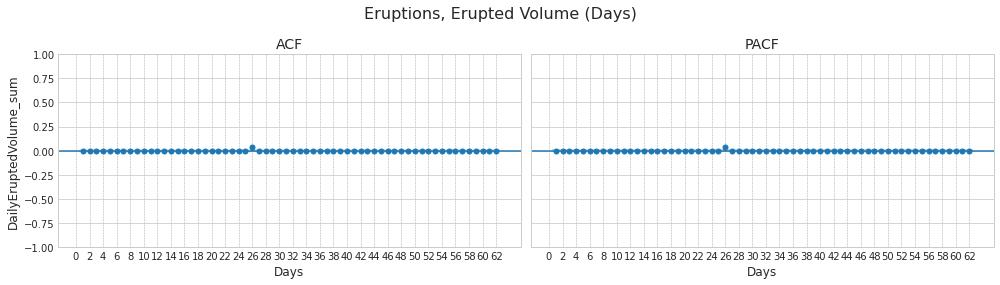

Number of NaN 18117, imputing (Eruptions, Max VEI) with mean value!


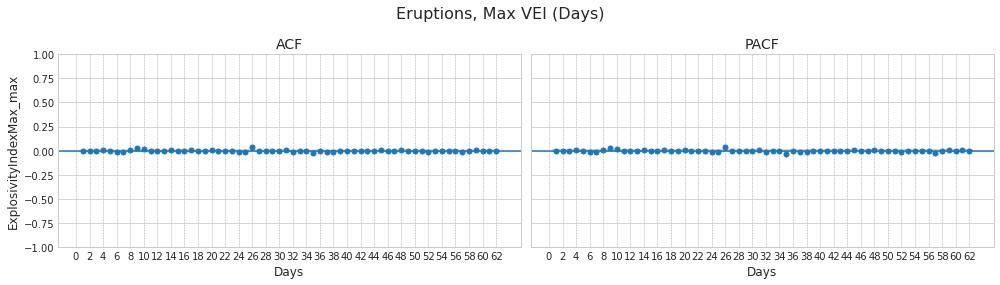

In [99]:
# ACF, PACF daily plots
lags = 2*31

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_daily_multi['count'], identification='Earthquakes, Count'))
plot_acf_pacf_series(ts1_data, feature_name="count", lags=lags, title="Earthquakes, Count", xlabel="Days")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_daily_multi['energy_sum'], identification='Earthquakes, Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_sum", lags=lags, title="Earthquakes, Released Energy", xlabel="Days")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_daily_multi['mag_max'], identification='Earthquakes, max Magnitude'))
plot_acf_pacf_series(ts1_data, feature_name="mag_max", lags=lags, title="Earthquakes, max Magnitude", xlabel="Days")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_daily_multi['StartingEruptions_count'], identification='Eruptions, Count'))
plot_acf_pacf_series(ts1_data, feature_name="StartingEruptions_count", lags=lags, title="Eruptions, Count", xlabel="Days")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_daily_multi['DailyEruptedVolume_sum'], identification='Eruptions, Erupted Volume'))
plot_acf_pacf_series(ts1_data, feature_name="DailyEruptedVolume_sum", lags=lags, title="Eruptions, Erupted Volume", xlabel="Days")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_daily_multi['ExplosivityIndexMax_max'], identification='Eruptions, Max VEI'))
plot_acf_pacf_series(ts1_data, feature_name="ExplosivityIndexMax_max", lags=lags, title="Eruptions, Max VEI", xlabel="Days")

No NaN found in (Earthquakes, Count)!


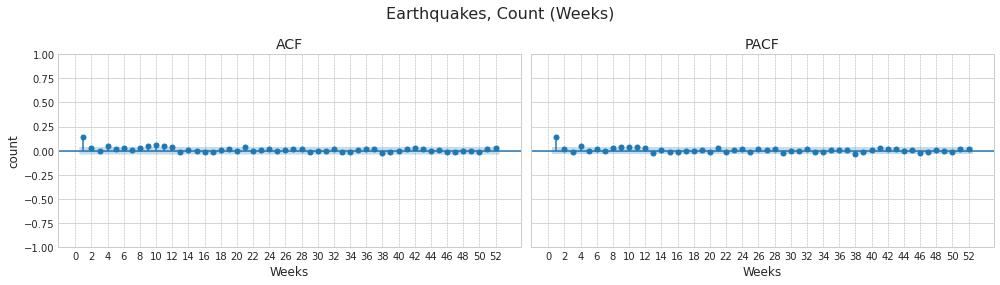

No NaN found in (Earthquakes, Released Energy)!


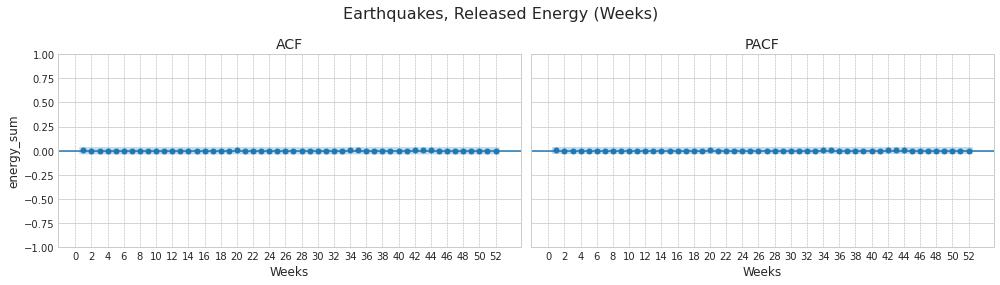

Number of NaN 1124, imputing (Earthquakes, Max Magnitude) with mean value!


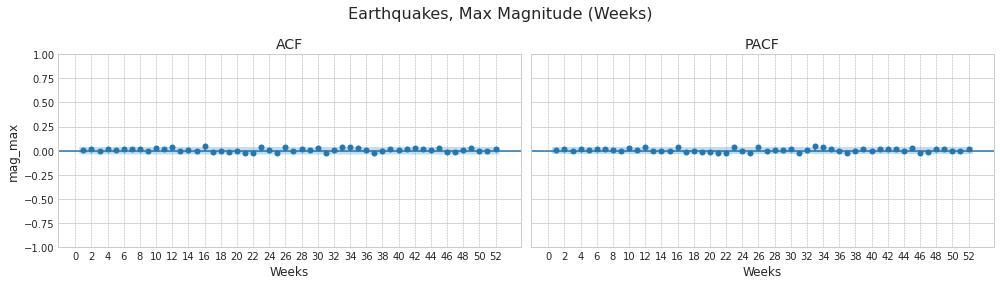

Number of NaN 2470, imputing (Eruptions, Count) with mean value!


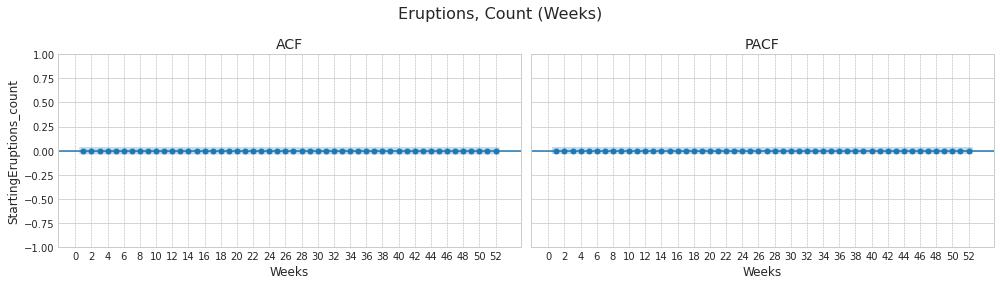

No NaN found in (Eruptions, Erupted Volume)!


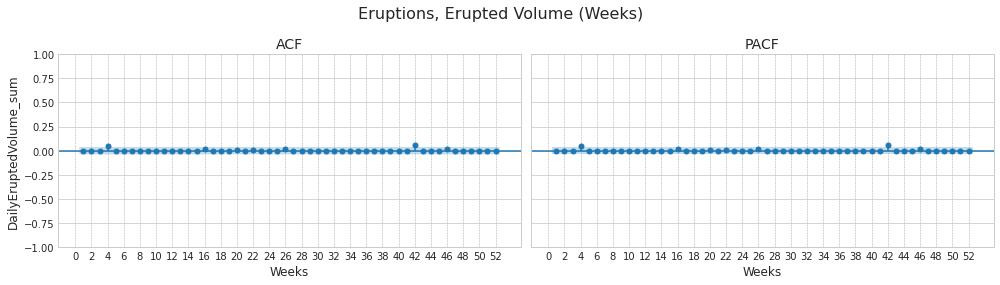

Number of NaN 2470, imputing (Eruptions, max VEI) with mean value!


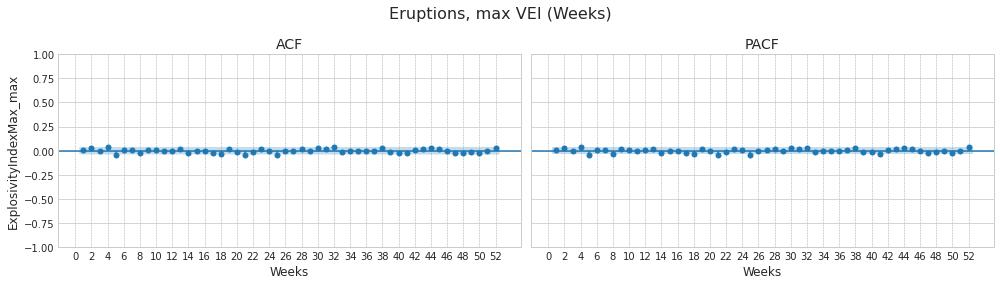

In [100]:
# ACF, PACF weekly plots
lags = 52

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_weekly_multi['count'], identification='Earthquakes, Count'))
plot_acf_pacf_series(ts1_data, feature_name="count", lags=lags, title="Earthquakes, Count", xlabel="Weeks")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_weekly_multi['energy_sum'], identification='Earthquakes, Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_sum", lags=lags, title="Earthquakes, Released Energy", xlabel="Weeks")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_weekly_multi['mag_max'], identification='Earthquakes, Max Magnitude'))
plot_acf_pacf_series(ts1_data, feature_name="mag_max", lags=lags, title="Earthquakes, Max Magnitude", xlabel="Weeks")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_weekly_multi['StartingEruptions_count'], identification='Eruptions, Count'))
plot_acf_pacf_series(ts1_data, feature_name="StartingEruptions_count", lags=lags, title="Eruptions, Count", xlabel="Weeks")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_weekly_multi['DailyEruptedVolume_sum'], identification='Eruptions, Erupted Volume'))
plot_acf_pacf_series(ts1_data, feature_name="DailyEruptedVolume_sum", lags=lags, title="Eruptions, Erupted Volume", xlabel="Weeks")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_weekly_multi['ExplosivityIndexMax_max'], identification='Eruptions, max VEI'))
plot_acf_pacf_series(ts1_data, feature_name="ExplosivityIndexMax_max", lags=lags, title="Eruptions, max VEI", xlabel="Weeks")

No NaN found in (Earthquakes, Count)!


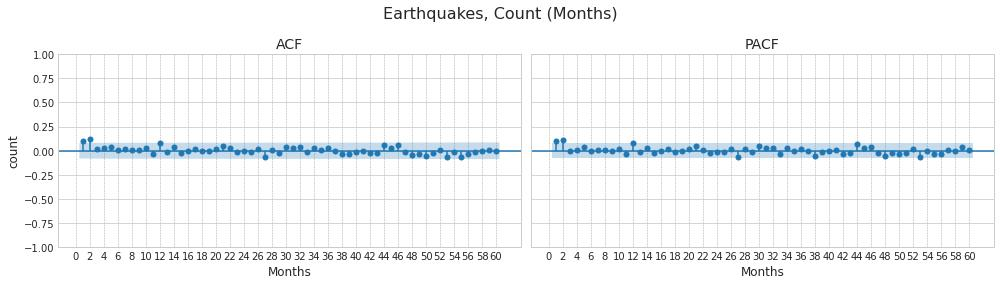

No NaN found in (Earthquakes, Released Energy)!


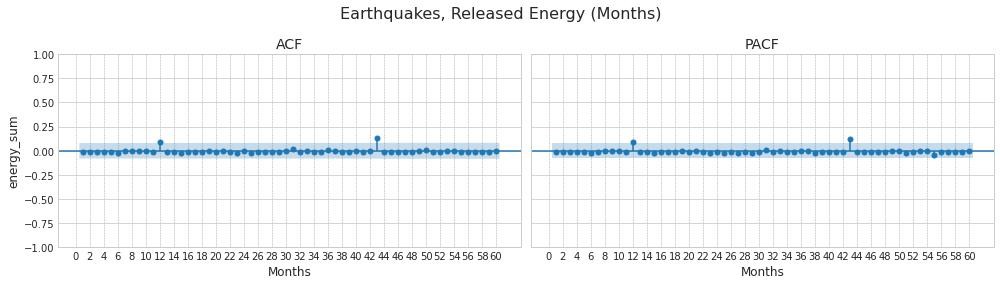

Number of NaN 20, imputing (Earthquakes, max Released Energy) with mean value!


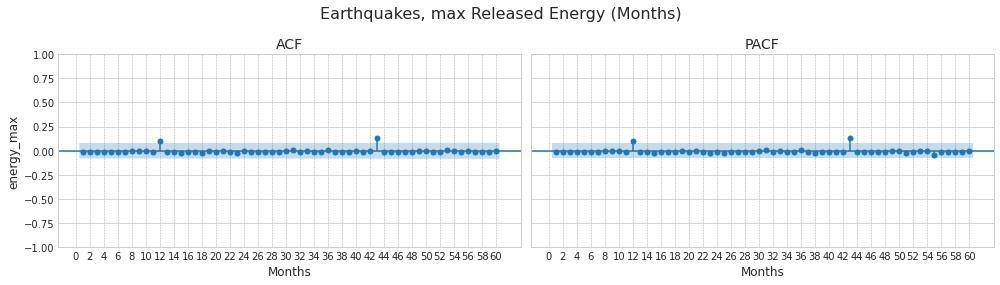

Number of NaN 477, imputing (Eruptions, Count) with mean value!


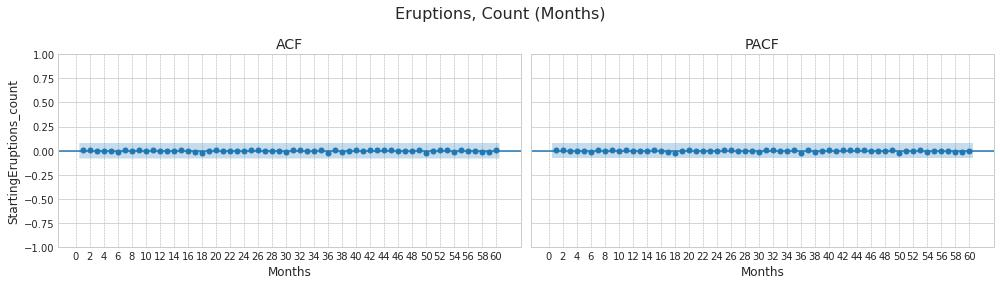

No NaN found in (Eruptions, Erupted Volume)!


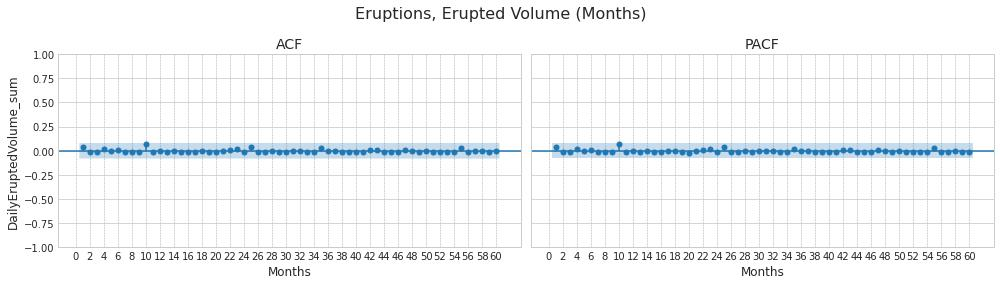

Number of NaN 477, imputing (Eruptions, max VEI) with mean value!


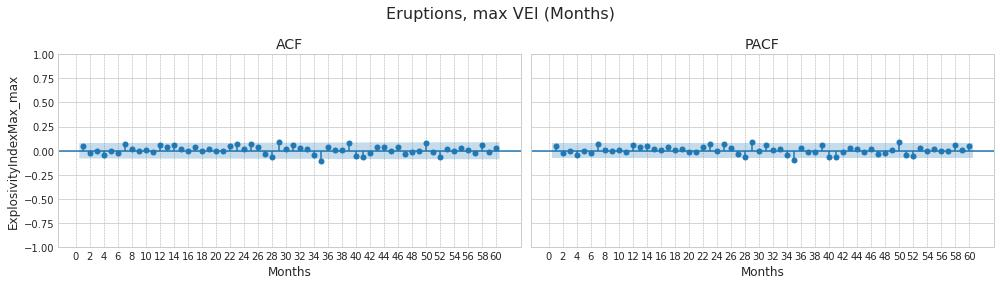

In [101]:
# ACF, PACF monthly plots
lags = 60

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_monthly_multi['count'], identification='Earthquakes, Count'))
plot_acf_pacf_series(ts1_data, feature_name="count", lags=lags, title="Earthquakes, Count", xlabel="Months")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_monthly_multi['energy_sum'], identification='Earthquakes, Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_sum", lags=lags, title="Earthquakes, Released Energy", xlabel="Months")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_monthly_multi['energy_max'], identification='Earthquakes, max Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_max", lags=lags, title="Earthquakes, max Released Energy", xlabel="Months")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_monthly_multi['StartingEruptions_count'], identification='Eruptions, Count'))
plot_acf_pacf_series(ts1_data, feature_name="StartingEruptions_count", lags=lags, title="Eruptions, Count", xlabel="Months")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_monthly_multi['DailyEruptedVolume_sum'], identification='Eruptions, Erupted Volume'))
plot_acf_pacf_series(ts1_data, feature_name="DailyEruptedVolume_sum", lags=lags, title="Eruptions, Erupted Volume", xlabel="Months")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_monthly_multi['ExplosivityIndexMax_max'], identification='Eruptions, max VEI'))
plot_acf_pacf_series(ts1_data, feature_name="ExplosivityIndexMax_max", lags=lags, title="Eruptions, max VEI", xlabel="Months")

No NaN found in (Earthquakes, Count)!


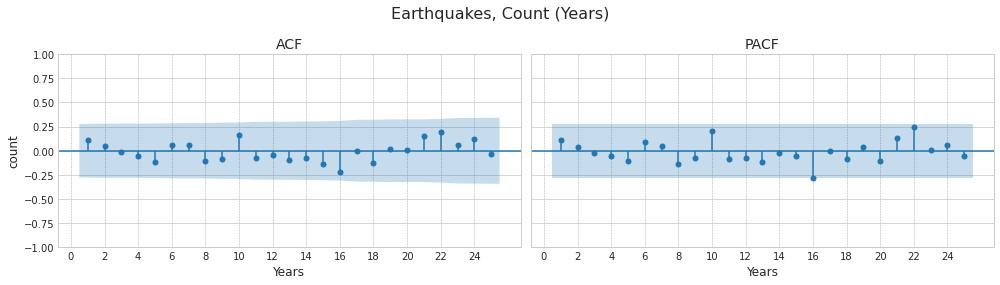

No NaN found in (Earthquakes, Released Energy)!


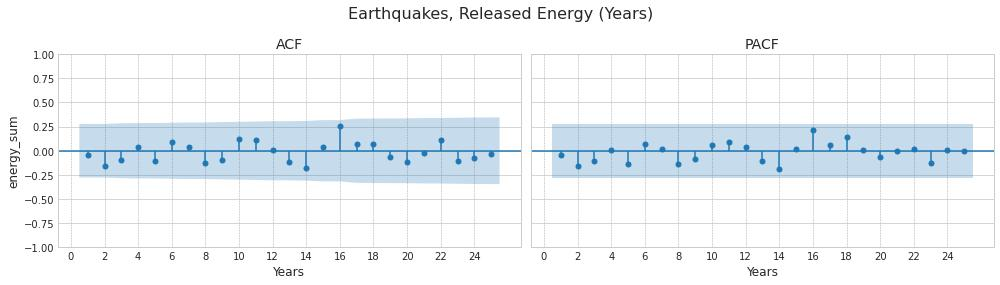

No NaN found in (Earthquakes, max Released Energy)!


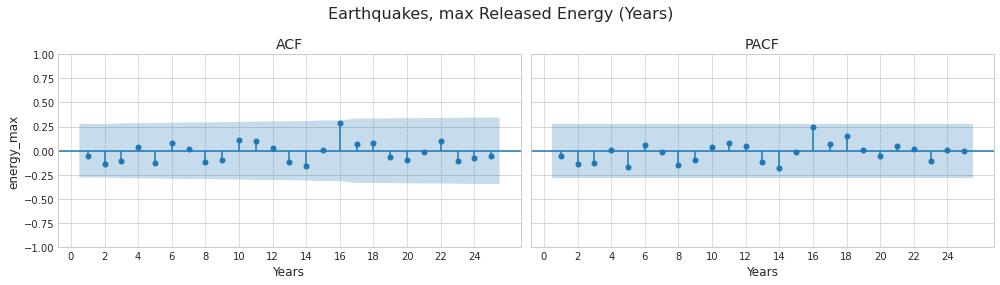

No NaN found in (Eruptions, Count)!


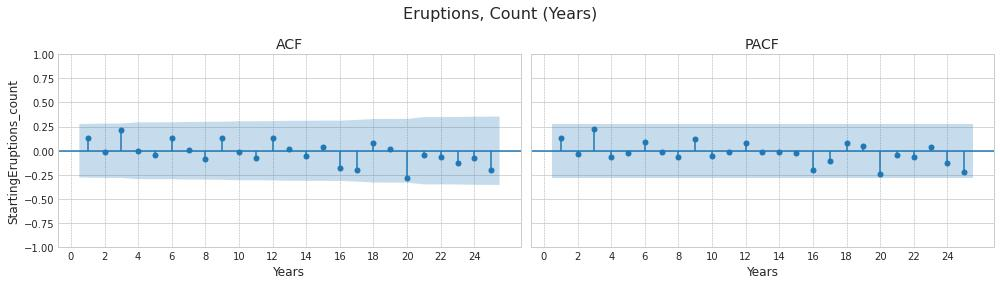

No NaN found in (Eruptions, Erupted Volume)!


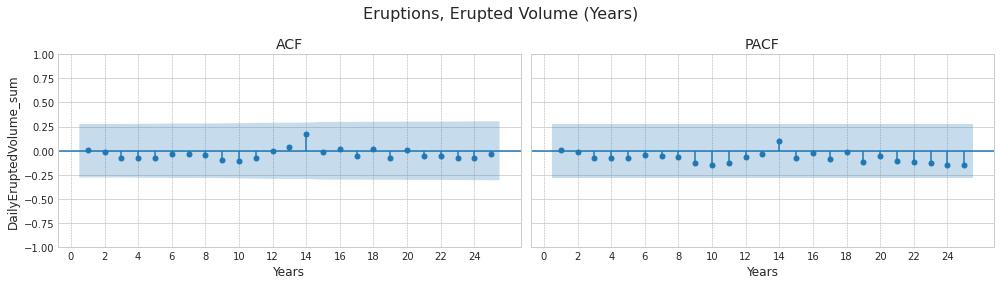

Number of NaN 4, imputing (Eruptions, max VEI) with mean value!


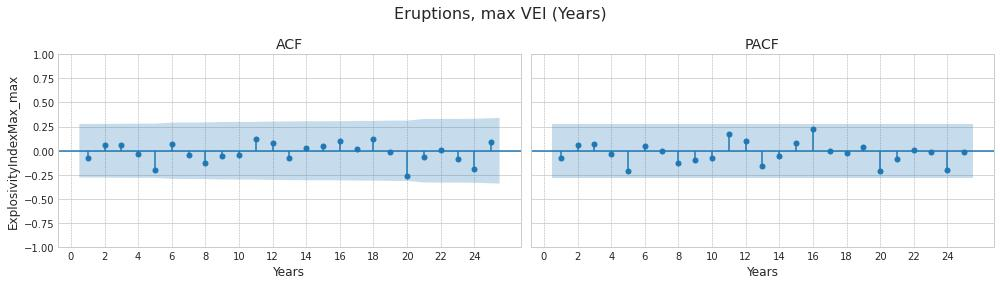

In [102]:
# # ACF, PACF yearly plots
# only 50% of the sample size is possible to calculate for PACF
lags_pacf = 25

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['count'], identification='Earthquakes, Count'))
plot_acf_pacf_series(ts1_data, feature_name="count", lags=lags_pacf, title="Earthquakes, Count", xlabel="Years")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['energy_sum'], identification='Earthquakes, Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_sum", lags=lags_pacf, title="Earthquakes, Released Energy", xlabel="Years")

ts1_data = pd.DataFrame(impute_timeseries(ts=eq_ts_yearly_multi['energy_max'], identification='Earthquakes, max Released Energy'))
plot_acf_pacf_series(ts1_data, feature_name="energy_max", lags=lags_pacf, title="Earthquakes, max Released Energy", xlabel="Years")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['StartingEruptions_count'], identification='Eruptions, Count'))
plot_acf_pacf_series(ts1_data, feature_name="StartingEruptions_count", lags=lags_pacf, title="Eruptions, Count", xlabel="Years")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['DailyEruptedVolume_sum'], identification='Eruptions, Erupted Volume'))
plot_acf_pacf_series(ts1_data, feature_name="DailyEruptedVolume_sum", lags=lags_pacf, title="Eruptions, Erupted Volume", xlabel="Years")

ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_yearly_multi['ExplosivityIndexMax_max'], identification='Eruptions, max VEI'))
plot_acf_pacf_series(ts1_data, feature_name="ExplosivityIndexMax_max", lags=lags_pacf, title="Eruptions, max VEI", xlabel="Years")

## Fourier Transformation (Frequency & Period Domain) and STFT

No NaN found in (Earthquakes Count (Yearly))!

Most prominent frequencies (cycles/interval):
freq = 0.300000, T = 3, amp = 205
freq = 0.180000, T = 6, amp = 206
freq = 0.140000, T = 7, amp = 226
freq = 0.100000, T = 10, amp = 274
freq = 0.040000, T = 25, amp = 283


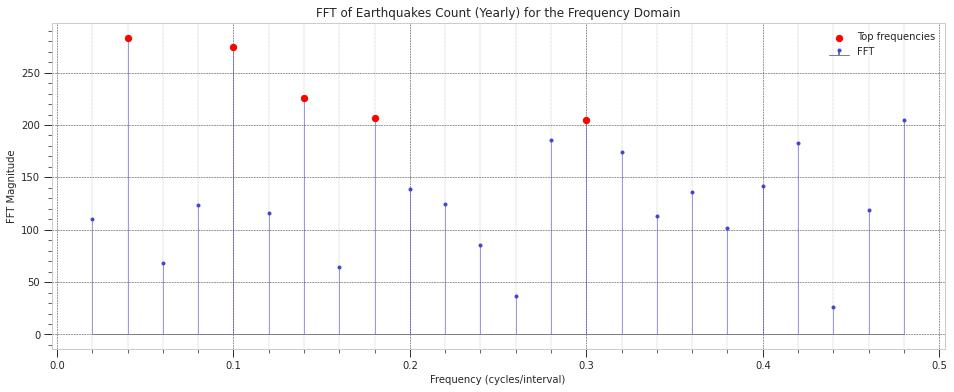

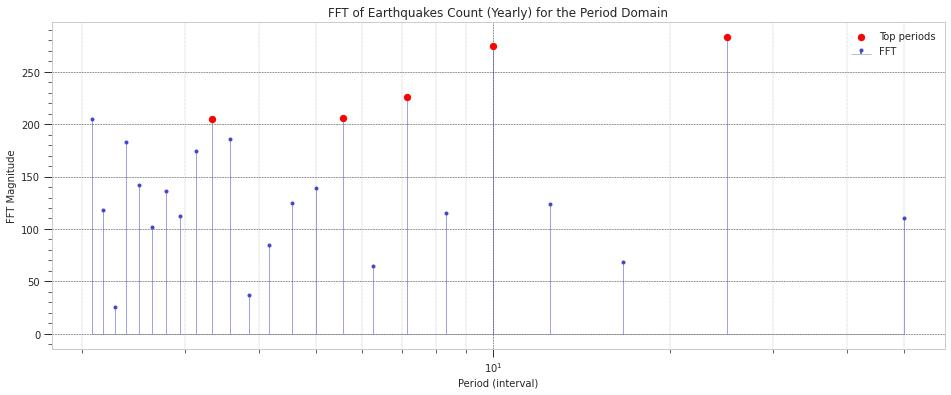

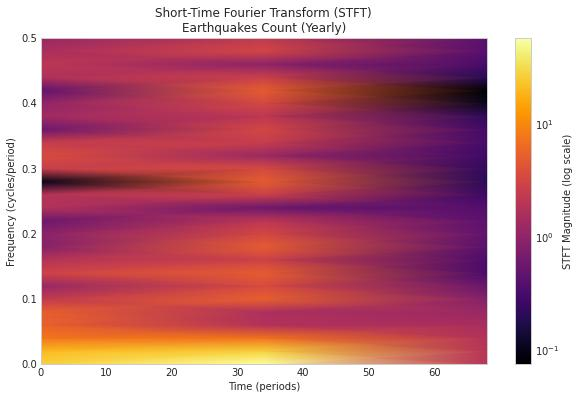

In [103]:
# FFT for Earthquakes Count (Yearly)
identification = 'Earthquakes Count (Yearly)'
ts1_data = impute_timeseries(ts=eq_ts_yearly_multi['count'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=64, noverlap=16, title=identification)

No NaN found in (Released Earthquake Energy (Yearly))!

Most prominent frequencies (cycles/interval):
freq = 0.440000, T = 2, amp = 139836814918683824
freq = 0.320000, T = 3, amp = 188315788233377984
freq = 0.280000, T = 4, amp = 182510179343193440
freq = 0.180000, T = 6, amp = 227991301576566272
freq = 0.120000, T = 8, amp = 141481299639446384


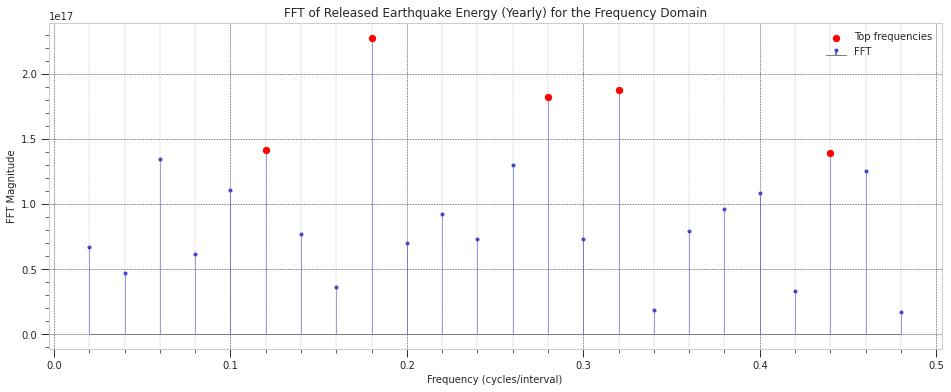

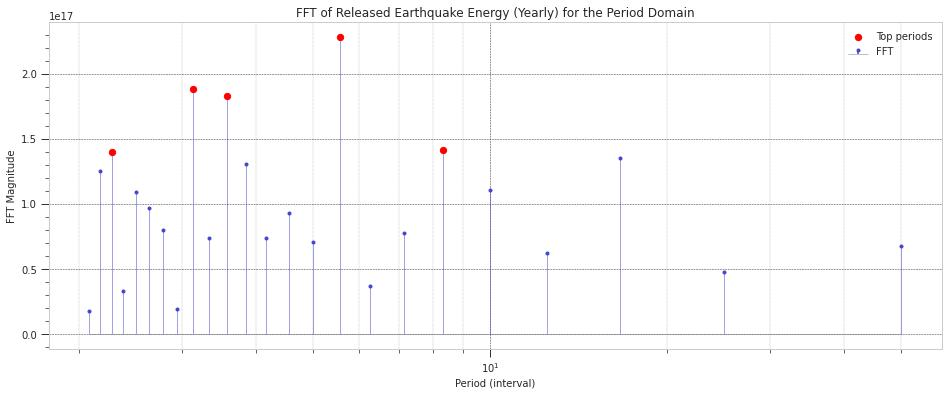

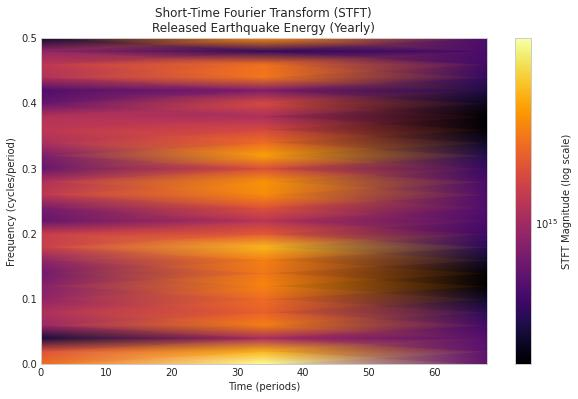

In [104]:
# FFT for Released Earthquake Energy (Yearly)
identification = 'Released Earthquake Energy (Yearly)'
ts1_data = impute_timeseries(ts=eq_ts_yearly_multi['energy_sum'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=64, noverlap=16, title=identification)

No NaN found in (Eruptions Count (Yearly))!

Most prominent frequencies (cycles/interval):
freq = 0.340000, T = 3, amp = 22
freq = 0.320000, T = 3, amp = 20
freq = 0.220000, T = 5, amp = 19
freq = 0.100000, T = 10, amp = 16
freq = 0.020000, T = 50, amp = 27


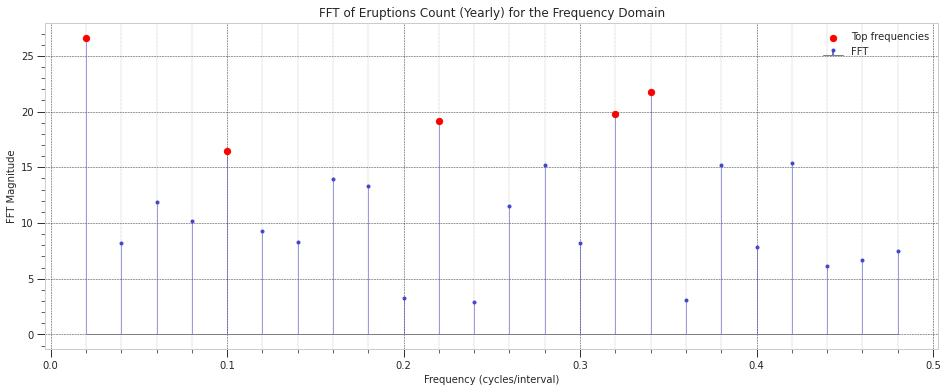

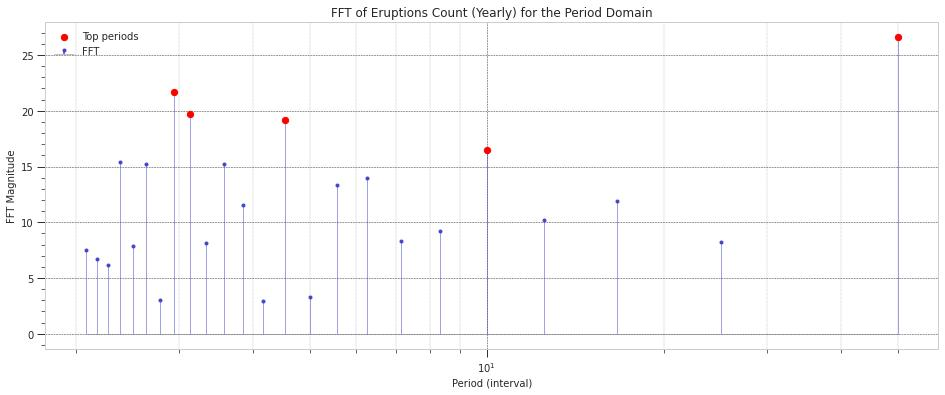

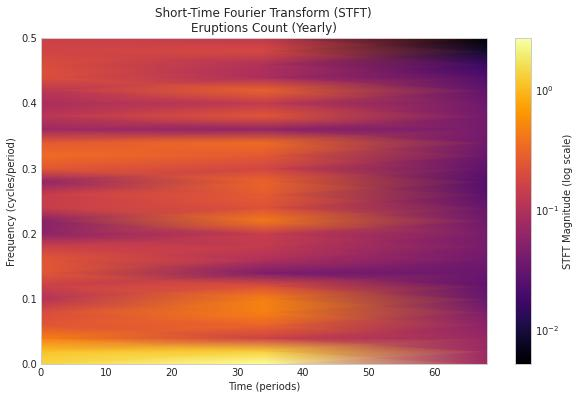

In [105]:
# FFT for Eruption Count (Yearly)
identification = 'Eruptions Count (Yearly)'
ts1_data = impute_timeseries(ts=erupt_ts_yearly_multi['StartingEruptions_count'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=64, noverlap=16, title=identification)

No NaN found in (Erupted Volume (Yearly))!

Most prominent frequencies (cycles/interval):
freq = 0.440000, T = 2, amp = 278707124
freq = 0.380000, T = 3, amp = 262156287
freq = 0.300000, T = 3, amp = 266455878
freq = 0.140000, T = 7, amp = 277376576
freq = 0.080000, T = 12, amp = 264563467


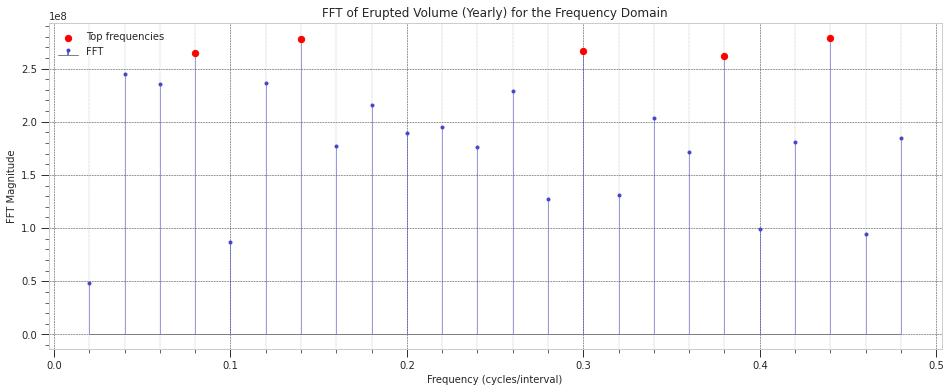

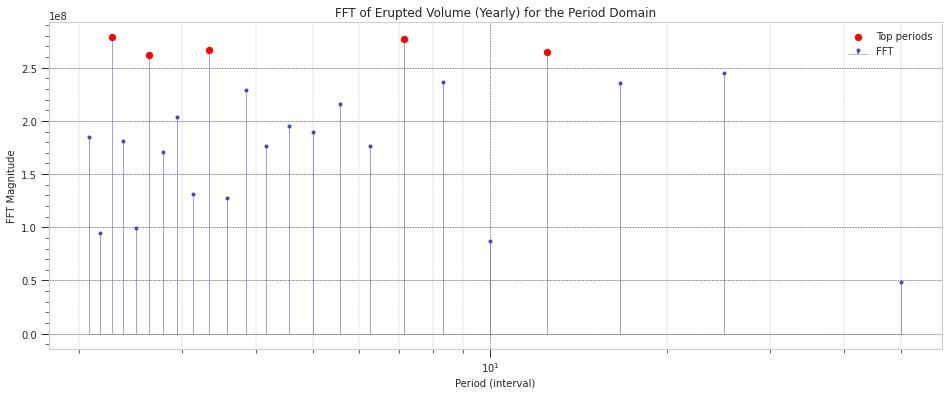

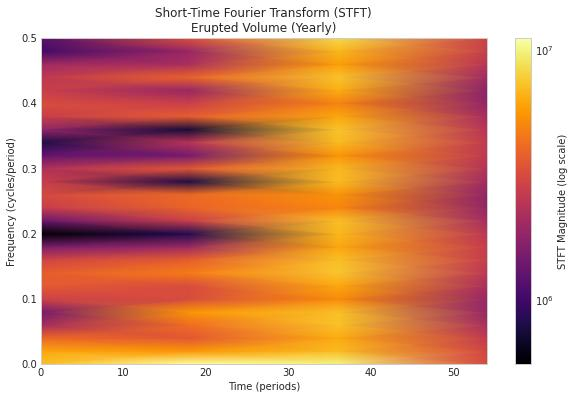

In [106]:
# FFT for Erupted Volume (Yearly)
identification = 'Erupted Volume (Yearly)'
ts1_data = impute_timeseries(ts=erupt_ts_yearly_multi['DailyEruptedVolume_sum'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=128, noverlap=32, title=identification)

No NaN found in (Max Earthquake Magnitude (Yearly))!

Most prominent frequencies (cycles/interval):
freq = 0.460000, T = 2, amp = 5
freq = 0.320000, T = 3, amp = 6
freq = 0.280000, T = 4, amp = 5
freq = 0.180000, T = 6, amp = 6
freq = 0.080000, T = 12, amp = 4


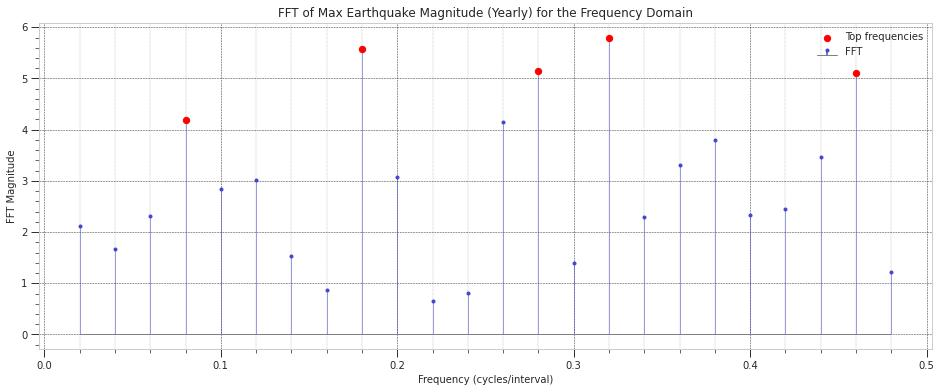

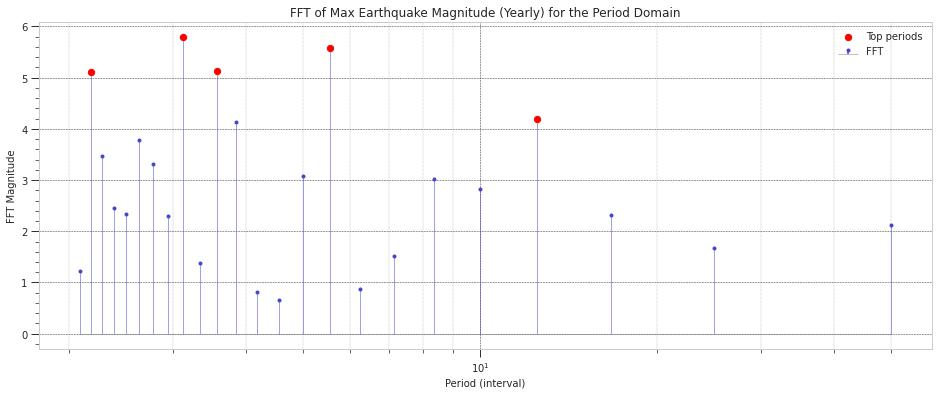

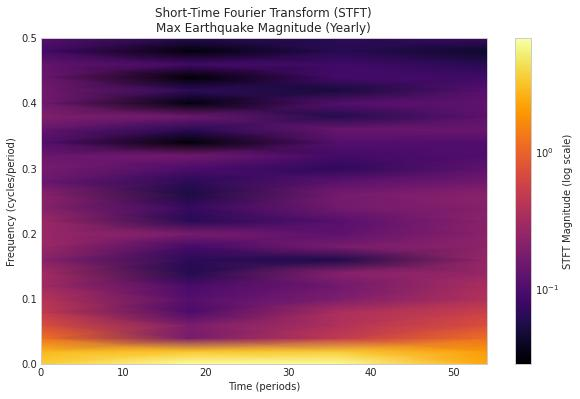

In [107]:
# FFT for Max Earthquake Magnitude (Yearly)
identification = 'Max Earthquake Magnitude (Yearly)'
ts1_data = impute_timeseries(ts=eq_ts_yearly_multi['mag_max'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=128, noverlap=32, title=identification)

Number of NaN 4, imputing (Max VEI (Yearly)) with mean value!

Most prominent frequencies (cycles/interval):
freq = 0.440000, T = 2, amp = 9
freq = 0.320000, T = 3, amp = 8
freq = 0.280000, T = 4, amp = 9
freq = 0.180000, T = 6, amp = 9
freq = 0.060000, T = 17, amp = 8


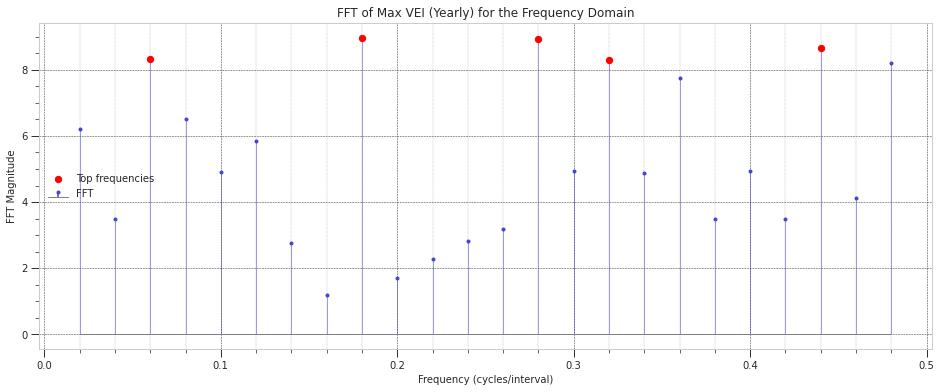

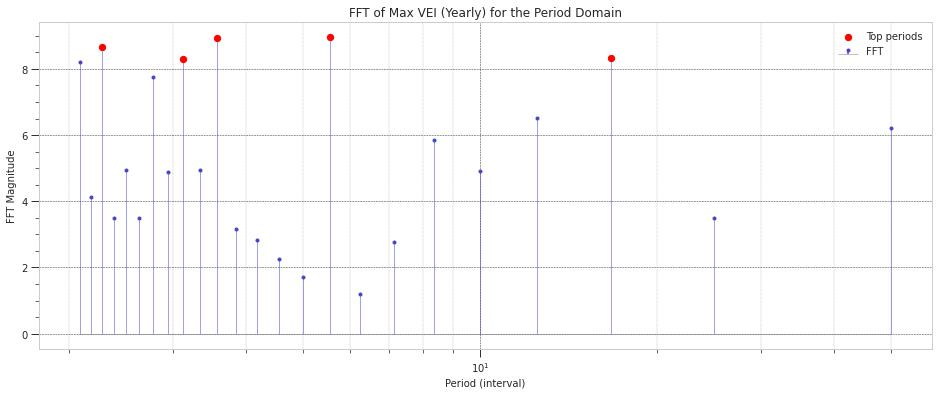

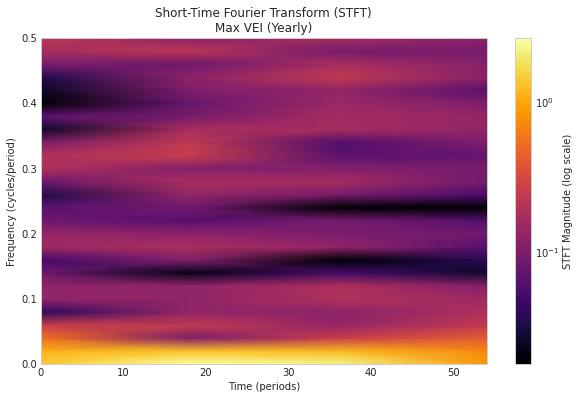

In [108]:
# FFT for Max VEI (Yearly)
identification = 'Max VEI (Yearly)'
ts1_data = impute_timeseries(ts=erupt_ts_yearly_multi['ExplosivityIndexMax_max'], identification=identification)
analyze_and_plot_fft(ts_data=ts1_data, num_n=5, identification=identification)

# STFT
plot_stft(ts1_data.values, fs=1, window_size=128, noverlap=32, title=identification)

## Seasonal decomposition (one feature only)

No NaN found in (active eruptions)!


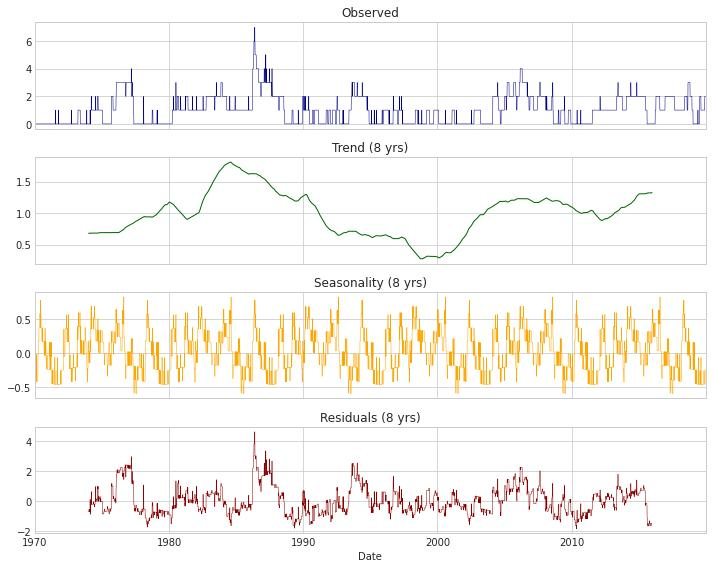

In [109]:
# Seasonal decomposition of daily ActiveEruptions
# because this is obviously a timeseries with trend and seasonal components

# impute data
ts1_data = pd.DataFrame(impute_timeseries(ts=erupt_ts_daily_multi['ActiveEruptions'], identification='active eruptions'))

# decompose the time series (components of trend, seasonality, noise, risiduals)
period=8*365
result_seasonal = seasonal_decompose(ts1_data, model='additive', two_sided=True, period=period)

# plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
result_seasonal.observed.plot(ax=axes[0], title='Observed', color='darkblue', linewidth=0.5)
result_seasonal.trend.plot(ax=axes[1], title='Trend (8 yrs)', color='darkgreen', linewidth=1.0)
result_seasonal.seasonal.plot(ax=axes[2], title='Seasonality (8 yrs)', color='orange', linewidth=0.5)
result_seasonal.resid.plot(ax=axes[3], title='Residuals (8 yrs)', color='darkred', linewidth=0.5)
plt.tight_layout()
plt.show()

##### From here on it's only manually ...

In [110]:
# exit
sys.exit(1)

SystemExit: 1

## Crosscorrelation analysis CCF
incl. imputation, handling heteroskedasticity, and handling stationarity.

### (1) Yearly 'Earthquakes Count' vs. 'Starting Eruptions'

In [ ]:
# select the two timeseries
t1_data = eq_ts_yearly_multi.copy()
ts1_identification = 'Earthquakes Count'
ts1_data = impute_timeseries(ts=t1_data['count'], identification=ts1_identification)

t2_data = erupt_ts_yearly_multi.copy()
ts2_identification = 'Starting Eruptions'
ts2_data = impute_timeseries(ts=t2_data['StartingEruptions_count'], identification=ts2_identification)

# handle non-matching values for Box Cox transformations for both timeseries
negative_indices1 = ts1_data[ts1_data <= 0].index
print("\nts1: Non-matching values for Box Cox transformation:", len(negative_indices1))
for idx in negative_indices1:
    print(f"Index: {idx}, Value: {ts1_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices1); ts2_data = ts2_data.drop(negative_indices1)
ts1_data.loc[negative_indices1] = 0.000001

negative_indices2 = ts2_data[ts2_data <= 0].index
print("\nts2: Non-matching values for Box Cox transformation:", len(negative_indices2))
for idx in negative_indices2:
    print(f"Index: {idx}, Value: {ts2_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices2); ts2_data = ts2_data.drop(negative_indices2)
ts2_data.loc[negative_indices2] = 0.000001

In [ ]:
# check for heteroskedasticity
try:
    display(perform_heteroskedasticity_tests(ts1_data))
except:
    print("Error for statistical tests heteroskedasticity for ts1")
    
try:    
    display(perform_heteroskedasticity_tests(ts2_data))
except:
    print("Error for statistical tests heteroskedasticity for ts2")

# # Manually apply Box-Cox transformation if heteroskedasticity is detected
# lambda_value = 6.5
# transformed_values1 = boxcox(ts1_data, lmbda=lambda_value)
# ts1_transformed = pd.Series(transformed_values1, index=ts1_data.index)

# lambda_value = 13.0
# transformed_values2 = boxcox(ts2_data, lmbda=lambda_value)
# ts2_transformed = pd.Series(transformed_values2, index=ts2_data.index)

# # check again for heteroskedasticity
# display(perform_heteroskedasticity_tests(ts1_transformed))
# display(perform_heteroskedasticity_tests(ts2_transformed))

# use original data if tests are okay or fail
ts1_transformed = ts1_data
ts2_transformed = ts2_data

In [ ]:
# manual workflow to handle stationarity (and differenciate)
# plot timeseries for checking effects

# ======= ts1 ======= 
ts1_result_stationarity = check_stationarity(ts1_transformed, ts1_identification)
ts1_transformed.plot();plt.show()

print(f"(1) Differencing {ts1_identification}")
ts1_processed = ts1_transformed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

# print(f"(2) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# print(f"(3) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# =======  ts2 ======= 
print()
ts2_result_stationarity = check_stationarity(ts2_transformed, ts2_identification)
ts2_transformed.plot();plt.show()

ts2_processed = ts2_transformed

# print(f"(1) Differencing {ts2_identification}")
# ts2_processed = ts2_transformed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

# print(f"(2) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

# print(f"(3) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

In [ ]:
# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='stem',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=None,
    figsize=(15, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='line',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=(-20,25),
    figsize=(15, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

### (2) Yearly 'Released Earthquake Energy' vs. 'Erupted Volume'

In [ ]:
# select the two timeseries
t1_data = eq_ts_yearly_multi.copy()
ts1_identification = 'Released Earthquake Energy'
ts1_data = impute_timeseries(ts=t1_data['energy_sum'], identification=ts1_identification)

t2_data = erupt_ts_yearly_multi.copy()
ts2_identification = 'Erupted Volume'
ts2_data = impute_timeseries(ts=t2_data['DailyEruptedVolume_sum'], identification=ts2_identification)

# handle non-matching values for Box Cox transformations for both timeseries
negative_indices1 = ts1_data[ts1_data <= 0].index
print("\nts1: Non-matching values for Box Cox transformation:", len(negative_indices1))
for idx in negative_indices1:
    print(f"Index: {idx}, Value: {ts1_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices1); ts2_data = ts2_data.drop(negative_indices1)
ts1_data.loc[negative_indices1] = 0.000001

negative_indices2 = ts2_data[ts2_data <= 0].index
print("\nts2: Non-matching values for Box Cox transformation:", len(negative_indices2))
for idx in negative_indices2:
    print(f"Index: {idx}, Value: {ts2_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices2); ts2_data = ts2_data.drop(negative_indices2)
ts2_data.loc[negative_indices2] = 0.000001

In [ ]:
# check for heteroskedasticity
try:
    display(perform_heteroskedasticity_tests(ts1_data))
except:
    print("Error for statistical tests heteroskedasticity for ts1")
    
try:    
    display(perform_heteroskedasticity_tests(ts2_data))
except:
    print("Error for statistical tests heteroskedasticity for ts2")

# Manually apply Box-Cox transformation if heteroskedasticity is detected
lambda_value = 4.5
transformed_values1 = boxcox(ts1_data, lmbda=lambda_value)
ts1_transformed = pd.Series(transformed_values1, index=ts1_data.index)

# lambda_value = 1.0
# transformed_values2 = boxcox(ts2_data, lmbda=lambda_value)
# ts2_transformed = pd.Series(transformed_values2, index=ts2_data.index)

# check again for heteroskedasticity
display(perform_heteroskedasticity_tests(ts1_transformed))
display(perform_heteroskedasticity_tests(ts2_transformed))

# # use original data if tests are okay or fail
# ts1_transformed = ts1_data
ts2_transformed = ts2_data

In [ ]:
# manual workflow to handle stationarity (and differenciate)
# plot timeseries for checking effects

# ======= ts1 ======= 
ts1_result_stationarity = check_stationarity(ts1_transformed, ts1_identification)
ts1_transformed.plot();plt.show()

print(f"(1) Differencing {ts1_identification}")
ts1_processed = ts1_transformed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

print(f"(2) Differencing {ts1_identification}")
ts1_processed = ts1_processed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

# print(f"(3) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# =======  ts2 ======= 
print()
ts2_result_stationarity = check_stationarity(ts2_transformed, ts2_identification)
ts2_transformed.plot();plt.show()

print(f"(1) Differencing {ts2_identification}")
ts2_processed = ts2_transformed.diff().dropna()
ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
ts2_processed.plot();plt.show()

# print(f"(2) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

# print(f"(3) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

In [ ]:
# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='stem',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=None,
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='line',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=(-20,20),
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

### (3) Yearly 'Released Earthquake Energy' vs. 'Starting Eruptions'

In [111]:
# select the two timeseries
t1_data = eq_ts_yearly_multi.copy()
ts1_identification = 'Released Earthquake Energy'
ts1_data = impute_timeseries(ts=t1_data['energy_sum'], identification=ts1_identification)

t2_data = erupt_ts_yearly_multi.copy()
ts2_identification = 'Starting Eruptions'
ts2_data = impute_timeseries(ts=t2_data['StartingEruptions_count'], identification=ts2_identification)

# handle non-matching values for Box Cox transformations for both timeseries
negative_indices1 = ts1_data[ts1_data <= 0].index
print("\nts1: Non-matching values for Box Cox transformation:", len(negative_indices1))
for idx in negative_indices1:
    print(f"Index: {idx}, Value: {ts1_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices1); ts2_data = ts2_data.drop(negative_indices1)
ts1_data.loc[negative_indices1] = 0.000001

negative_indices2 = ts2_data[ts2_data <= 0].index
print("\nts2: Non-matching values for Box Cox transformation:", len(negative_indices2))
for idx in negative_indices2:
    print(f"Index: {idx}, Value: {ts2_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices2); ts2_data = ts2_data.drop(negative_indices2)
ts2_data.loc[negative_indices2] = 0.000001

No NaN found in (Released Earthquake Energy)!
No NaN found in (Starting Eruptions)!

ts1: Non-matching values for Box Cox transformation: 0

ts2: Non-matching values for Box Cox transformation: 4
Index: 1970-12-31 00:00:00, Value: 0.0
Index: 2003-12-31 00:00:00, Value: 0.0
Index: 2015-12-31 00:00:00, Value: 0.0
Index: 2017-12-31 00:00:00, Value: 0.0


In [112]:
# check for heteroskedasticity
try:
    display(perform_heteroskedasticity_tests(ts1_data))
except:
    print("Error for statistical tests heteroskedasticity for ts1")
    
try:    
    display(perform_heteroskedasticity_tests(ts2_data))
except:
    print("Error for statistical tests heteroskedasticity for ts2")

# # Manually apply Box-Cox transformation if heteroskedasticity is detected
# lambda_value = 4.5
# transformed_values1 = boxcox(ts1_data, lmbda=lambda_value)
# ts1_transformed = pd.Series(transformed_values1, index=ts1_data.index)

# ts2_transformed = ts2_data

# lambda_value = -3
# transformed_values2 = boxcox(ts2_data, lmbda=lambda_value)
# ts2_transformed = pd.Series(transformed_values2, index=ts2_data.index)

# # check again for heteroskedasticity
# display(perform_heteroskedasticity_tests(ts1_transformed))
# display(perform_heteroskedasticity_tests(ts2_transformed))

# use original data if tests are okay or fail
ts1_transformed = ts1_data
ts2_transformed = ts2_data

,Statistic,p-value,Hypothesis,Heteroskedasticity
ARCH,0.24523,1.000000,FAIL to reject H0,no
Breusch-Pagan,-5.499845,1.000000,FAIL to reject H0,no
White,-6.21047,nan,FAIL to reject H0,no


,Statistic,p-value,Hypothesis,Heteroskedasticity
ARCH,5.431503,0.860555,FAIL to reject H0,no
Breusch-Pagan,0.27097,0.602682,FAIL to reject H0,no
White,2.119612,0.346523,FAIL to reject H0,no


Testing stationarity for Released Earthquake Energy


,Statistic,p-value,Number of Lags,Hypothesis,Stationarity
ADF,-5.573788,0.000001,0,Reject H0,yes
KPSS,0.244189,0.1,4,FAIL to reject H0,yes


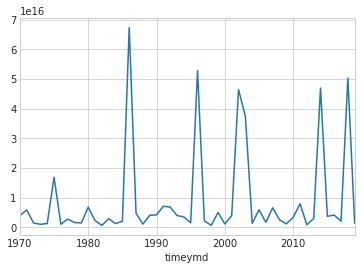

(1) Differencing Released Earthquake Energy
Testing stationarity for Released Earthquake Energy


,Statistic,p-value,Number of Lags,Hypothesis,Stationarity
ADF,-5.719638,0.000001,4,Reject H0,yes
KPSS,0.318211,0.1,30,FAIL to reject H0,yes


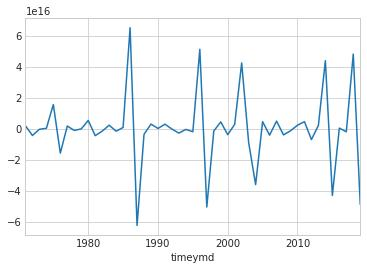


Testing stationarity for Starting Eruptions


,Statistic,p-value,Number of Lags,Hypothesis,Stationarity
ADF,-6.153051,0.0,0,Reject H0,yes
KPSS,0.244988,0.1,1,FAIL to reject H0,yes


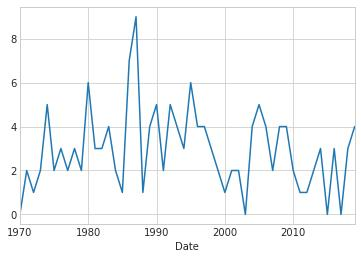

(1) Differencing Starting Eruptions
Testing stationarity for Starting Eruptions


,Statistic,p-value,Number of Lags,Hypothesis,Stationarity
ADF,-9.383366,0.0,1,Reject H0,yes
KPSS,0.202804,0.1,14,FAIL to reject H0,yes


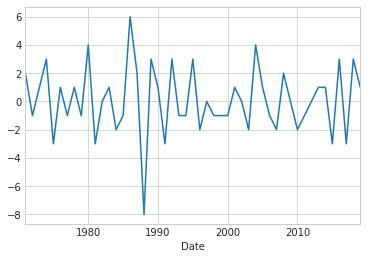

In [113]:
# manual workflow to handle stationarity (and differenciate)
# plot timeseries for checking effects

# ======= ts1 ======= 
ts1_result_stationarity = check_stationarity(ts1_transformed, ts1_identification)
ts1_transformed.plot();plt.show()

print(f"(1) Differencing {ts1_identification}")
ts1_processed = ts1_transformed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

# print(f"(2) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# print(f"(3) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# =======  ts2 ======= 
print()
ts2_result_stationarity = check_stationarity(ts2_transformed, ts2_identification)
ts2_transformed.plot();plt.show()

print(f"(1) Differencing {ts2_identification}")
ts2_processed = ts2_transformed.diff().dropna()
ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
ts2_processed.plot();plt.show()

# print(f"(2) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

# print(f"(3) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

2025-02-02 20:27:00,942 - INFO - None: 50_CCF_(Released_Earthquake_Energy_Starting_Eruptions)_(A-DEC)_(None).png to './data/scope/reclustered_1000/cluster_Cluster_6'.


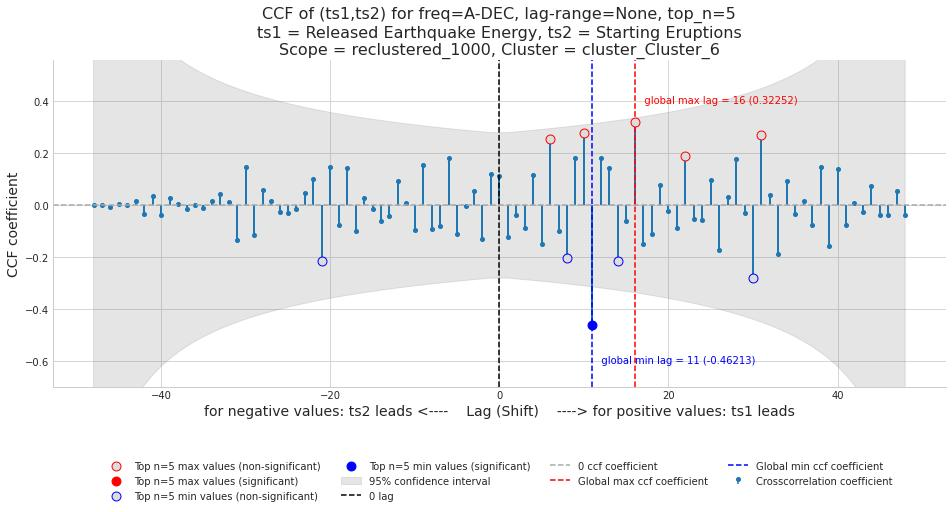

CCF min-max values for all lags


lag,ccf_coeff,ci_lower,ci_upper,sig,rank,label
-21,-0.214717,-0.363956,0.363956,,4,min
6,0.253862,-0.295476,0.295476,,4,max
8,-0.201527,-0.302429,0.302429,,5,min
10,0.277072,-0.309898,0.309898,,2,max
11,-0.462129,-0.313845,0.313845,sig,1,min
14,-0.215588,-0.326661,0.326661,,3,min
16,0.322524,-0.336131,0.336131,,1,max
22,0.191147,-0.370398,0.370398,,5,max
30,-0.280770,-0.438261,0.438261,,2,min
31,0.270837,-0.449647,0.449647,,3,max


2025-02-02 20:27:01,432 - INFO - None: 50_CCF_(Released_Earthquake_Energy_Starting_Eruptions)_(A-DEC)_(-10_20).png to './data/scope/reclustered_1000/cluster_Cluster_6'.


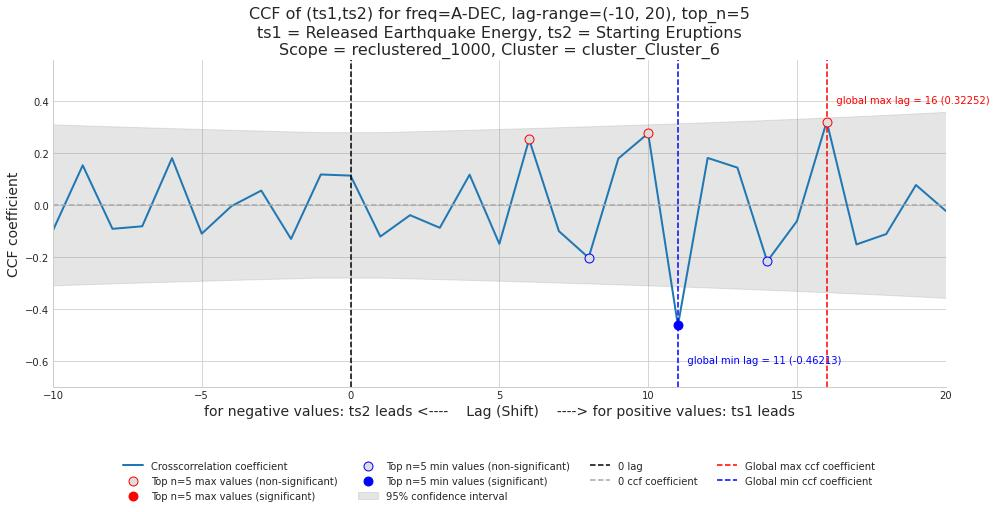

CCF min-max values for all lags


lag,ccf_coeff,ci_lower,ci_upper,sig,rank,label
-21,-0.214717,-0.363956,0.363956,,4,min
6,0.253862,-0.295476,0.295476,,4,max
8,-0.201527,-0.302429,0.302429,,5,min
10,0.277072,-0.309898,0.309898,,2,max
11,-0.462129,-0.313845,0.313845,sig,1,min
14,-0.215588,-0.326661,0.326661,,3,min
16,0.322524,-0.336131,0.336131,,1,max
22,0.191147,-0.370398,0.370398,,5,max
30,-0.280770,-0.438261,0.438261,,2,min
31,0.270837,-0.449647,0.449647,,3,max


In [114]:
# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='stem',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=None,
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='line',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=(-10,20),
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

### (4) Yearly 'Max Earthquake Magnitude' vs. 'Max Max VEI' 

In [ ]:
# select the two timeseries
t1_data = eq_ts_yearly_multi.copy()
ts1_identification = 'Max Earthquake Magnitude'
ts1_data = impute_timeseries(ts=t1_data['energy_max'], identification=ts1_identification)

t2_data = erupt_ts_yearly_multi.copy()
ts2_identification = 'Max VEI'
ts2_data = impute_timeseries(ts=t2_data['ExplosivityIndexMax_max'], identification=ts2_identification)

# handle non-matching values for Box Cox transformations for both timeseries
negative_indices1 = ts1_data[ts1_data <= 0].index
print("\nts1: Non-matching values for Box Cox transformation:", len(negative_indices1))
for idx in negative_indices1:
    print(f"Index: {idx}, Value: {ts1_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices1); ts2_data = ts2_data.drop(negative_indices1)
ts1_data.loc[negative_indices1] = 0.000001

negative_indices2 = ts2_data[ts2_data <= 0].index
print("\nts2: Non-matching values for Box Cox transformation:", len(negative_indices2))
for idx in negative_indices2:
    print(f"Index: {idx}, Value: {ts2_data.loc[idx]}")
#ts1_data = ts1_data.drop(negative_indices2); ts2_data = ts2_data.drop(negative_indices2)
ts2_data.loc[negative_indices2] = 0.000001

In [ ]:
# check for heteroskedasticity
try:
    display(perform_heteroskedasticity_tests(ts1_data))
except:
    print("Error for statistical tests heteroskedasticity for ts1")
    
try:    
    display(perform_heteroskedasticity_tests(ts2_data))
except:
    print("Error for statistical tests heteroskedasticity for ts2")
    
# Manually apply Box-Cox transformation if heteroskedasticity is detected
lambda_value = 5.0
transformed_values1 = boxcox(ts1_data, lmbda=lambda_value)
ts1_transformed = pd.Series(transformed_values1, index=ts1_data.index)

# lambda_value = 3.0
# transformed_values2 = boxcox(ts2_data, lmbda=lambda_value)
# ts2_transformed = pd.Series(transformed_values2, index=ts2_data.index)

# check again for heteroskedasticity
display(perform_heteroskedasticity_tests(ts1_transformed))
display(perform_heteroskedasticity_tests(ts2_transformed))

# use original data if tests are okay or fail
#ts1_transformed = ts1_data
ts2_transformed = ts2_data

In [ ]:
# manual workflow to handle stationarity (and differenciate)
# plot timeseries for checking effects

# ======= ts1 ======= 
ts1_result_stationarity = check_stationarity(ts1_transformed, ts1_identification)
ts1_transformed.plot();plt.show()

print(f"(1) Differencing {ts1_identification}")
ts1_processed = ts1_transformed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

print(f"(2) Differencing {ts1_identification}")
ts1_processed = ts1_processed.diff().dropna()
ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
ts1_processed.plot();plt.show()

# print(f"(3) Differencing {ts1_identification}")
# ts1_processed = ts1_processed.diff().dropna()
# ts1_result_stationarity = check_stationarity(ts1_processed, ts1_identification)
# ts1_processed.plot();plt.show()

# =======  ts2 ======= 
print()
ts2_result_stationarity = check_stationarity(ts2_transformed, ts2_identification)
ts2_transformed.plot();plt.show()

print(f"(1) Differencing {ts2_identification}")
ts2_processed = ts2_transformed.diff().dropna()
ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
ts2_processed.plot();plt.show()

# print(f"(2) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

# print(f"(3) Differencing {ts2_identification}")
# ts2_processed = ts2_processed.diff().dropna()
# ts2_result_stationarity = check_stationarity(ts2_processed, ts2_identification)
# ts2_processed.plot();plt.show()

In [ ]:
# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='stem',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=None,
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

# Call the function with set parameters and different lag-ranges
show_crosscorrelation_results(
    ts1=ts1_processed,
    ts2=ts2_processed,
    ts1_id=ts1_identification,
    ts2_id=ts2_identification,
    plot_type='line',
    plotwidth=2,
    plotsize=4,
    top_n=5,
    lag_limits=(-10,30),
    figsize=(16, 6),
    show_min_max_table=True,
    order_min_max_table=True,
    legend_cols=4,
    fft_highpower_lags=None,
    show_fft_highpower_lags_analysis=False,
    clustername = selected_subdir,
    scope = parameters.scope_id,
    figure_save_dir=data_ts_dir_cluster
)

## End of script

In [ ]:
# log the end of this script
logging.info(f"End of script '{script_name}'.")

## Appendix

In [ ]:
%%js

// -------------------------------------------
// What are the headings of this document?
// --> Get a better overview of the structure.
// -------------------------------------------

function listHeadings() {
    let headings = [];
    let cells = Jupyter.notebook.get_cells();
    
    cells.forEach((cell) => {
        if (cell.cell_type == 'markdown') {
            let text = cell.get_text();
            let lines = text.split('\n');
            
            lines.forEach((line) => {
                let match = line.match(/^(#+)\s+(.*)/);
                if (match) {
                    headings.push({
                        level: match[1].length, // Number of # symbols indicates the heading level
                        text: match[2].trim()
                    });
                }
            });
        }
    });
    return headings;
}

let headings = listHeadings();
headings.forEach((heading) => {
    let markdown = `${'#'.repeat(heading.level)} ${heading.text}`;
    element.append(`${markdown}<br>`);
});

## Save notebook as experimentation protocol

In [ ]:
# save notebook as a experimentation protocol
time.sleep(2)
display(Javascript('IPython.notebook.save_checkpoint();'))
time.sleep(2)
save_notebook_as_html(script_name, data_dir_cluster)